# JALA Data Scientist Take Home Test
- **Author:** Muhammad Arfian Praniza
- **Email:** fianpraniza@gmail.com
- **Linkedin:** https://www.linkedin.com/in/fianpraniza/
- **Contact:** +6281259676839

Import Libraries dan Loading Data

In [2]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from datetime import datetime, timedelta
from scipy import stats

# Pengaturan tampilan
plt.style.use('seaborn-v0_8-whitegrid')
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

# Fungsi untuk membaca file CSV
def load_data(file_path):
    try:
        return pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"File tidak ditemukan: {file_path}")
        return None

# Import semua dataset
print("Memuat dataset...")
farms = load_data('./data/farms.csv')
ponds = load_data('./data/ponds.csv')
cycles = load_data('./data/cycles.csv')
feeds = load_data('./data/feeds.csv')
fasting = load_data('./data/fasting.csv')
harvests = load_data('./data/harvests.csv')
sampling = load_data('./data/samplings.csv')
measurements = load_data('./data/measurements.csv')
mortalities = load_data('./data/mortalities.csv')
feed_tray = load_data('./data/feed_tray.csv')

# Memeriksa data yang berhasil dimuat
datasets = {
    'farms': farms,
    'ponds': ponds,
    'cycles': cycles,
    'feeds': feeds,
    'fasting': fasting,
    'harvests': harvests,
    'sampling': sampling,
    'measurements': measurements,
    'mortalities': mortalities,
    'feed_tray': feed_tray
}

# Menampilkan informasi dataset yang berhasil dimuat
print("\nDataset yang berhasil dimuat:")
for name, df in datasets.items():
    if df is not None:
        print(f"{name}: {df.shape[0]} baris, {df.shape[1]} kolom")

Memuat dataset...

Dataset yang berhasil dimuat:
farms: 551 baris, 4 kolom
ponds: 338 baris, 10 kolom
cycles: 2617 baris, 24 kolom
feeds: 706908 baris, 3 kolom
fasting: 6189 baris, 3 kolom
harvests: 8087 baris, 9 kolom
sampling: 15032 baris, 7 kolom
measurements: 139050 baris, 24 kolom
mortalities: 13221 baris, 7 kolom
feed_tray: 186664 baris, 10 kolom


Pemeriksaan Struktur Data

In [3]:
# Fungsi untuk menampilkan informasi dasar dataset
def explore_dataset(df, name):
    print(f"\n{'='*50}")
    print(f"Dataset: {name}")
    print(f"{'='*50}")
    
    print("\nInformasi Dataset:")
    print(f"Jumlah baris: {df.shape[0]}")
    print(f"Jumlah kolom: {df.shape[1]}")
    
    print("\nTipe data:")
    print(df.dtypes)
    
    print("\nSampel data (5 baris pertama):")
    print(df.head())
    
    print("\nStatistik deskriptif:")
    print(df.describe())
    
    print("\nNilai yang hilang:")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_info = pd.DataFrame({
        'Missing Values': missing,
        'Percentage (%)': missing_percent
    })
    print(missing_info[missing_info['Missing Values'] > 0])

# Memeriksa setiap dataset
for name, df in datasets.items():
    if df is not None:
        explore_dataset(df, name)


Dataset: farms

Informasi Dataset:
Jumlah baris: 551
Jumlah kolom: 4

Tipe data:
id           int64
province    object
regency     object
timezone    object
dtype: object

Sampel data (5 baris pertama):
     id          province     regency timezone
0   652        JAWA BARAT      SUBANG   +07:00
1   869  SULAWESI SELATAN       BARRU   +08:00
2   900        JAWA TIMUR     PACITAN   +07:00
3  1000        JAWA TIMUR   SITUBONDO   +07:00
4  1106        JAWA TIMUR  BANYUWANGI   +07:00

Statistik deskriptif:
                 id
count    551.000000
mean    8625.956443
std     2937.544875
min      652.000000
25%     6369.500000
50%     8531.000000
75%    10710.000000
max    13886.000000

Nilai yang hilang:
          Missing Values  Percentage (%)
province              72       13.067151
regency               93       16.878403

Dataset: ponds

Informasi Dataset:
Jumlah baris: 338
Jumlah kolom: 10

Tipe data:
id                    int64
farm_id               int64
length              float64
w

Praproses Data Tanggal dan Waktu

In [4]:
# Fungsi untuk mengkonversi kolom tanggal ke format datetime
def convert_date_columns(df, date_columns):
    df_copy = df.copy()
    for col in date_columns:
        if col in df_copy.columns:
            df_copy[col] = pd.to_datetime(df_copy[col], errors='coerce')
    return df_copy

# Daftar kolom tanggal di setiap dataset
date_columns = {
    'cycles': ['started_at', 'finished_at'],
    'feeds': ['logged_at'],
    'harvests': ['harvested_at'],
    'sampling': ['sampled_at'],
    'measurements': ['measured_at'],
    'mortalities': ['recorded_at'],
    'feed_tray': ['logged_at', 'feed_logged_at']
}

# Konversi kolom tanggal untuk setiap dataset
for name, cols in date_columns.items():
    if name in datasets and datasets[name] is not None:
        datasets[name] = convert_date_columns(datasets[name], cols)
        print(f"Kolom tanggal di dataset {name} telah dikonversi ke format datetime")

# Periksa hasil konversi untuk dataset cycles sebagai contoh
if 'cycles' in datasets and datasets['cycles'] is not None:
    print("\nContoh hasil konversi format tanggal pada dataset cycles:")
    print(datasets['cycles'][['started_at', 'finished_at']].head())

Kolom tanggal di dataset cycles telah dikonversi ke format datetime
Kolom tanggal di dataset feeds telah dikonversi ke format datetime
Kolom tanggal di dataset harvests telah dikonversi ke format datetime
Kolom tanggal di dataset sampling telah dikonversi ke format datetime
Kolom tanggal di dataset measurements telah dikonversi ke format datetime
Kolom tanggal di dataset mortalities telah dikonversi ke format datetime
Kolom tanggal di dataset feed_tray telah dikonversi ke format datetime

Contoh hasil konversi format tanggal pada dataset cycles:
  started_at finished_at
0 2022-10-14  2023-01-29
1 2023-04-26  2023-06-23
2 2023-08-01  2023-10-18
3 2022-07-19  2022-09-29
4 2022-07-07  2022-09-20


Evaluasi Kelengkapan Data

In [5]:
# Fungsi untuk mengevaluasi kelengkapan data
def evaluate_data_completeness(datasets):
    print("\n" + "="*50)
    print("EVALUASI KELENGKAPAN DATA")
    print("="*50)
    
    issues = []
    
    # Periksa nilai yang hilang di setiap dataset
    print("\n1. Nilai yang hilang di setiap dataset:")
    for name, df in datasets.items():
        if df is not None:
            missing = df.isnull().sum()
            missing_percent = (missing / len(df)) * 100
            missing_cols = missing[missing > 0]
            
            if len(missing_cols) > 0:
                print(f"\nDataset: {name}")
                for col, count in missing_cols.items():
                    percent = missing_percent[col]
                    print(f"  - {col}: {count} nilai hilang ({percent:.2f}%)")
                    issues.append({
                        'dataset': name,
                        'column': col,
                        'issue': 'missing_values',
                        'count': count,
                        'percentage': percent
                    })
    
    # Periksa nilai yang tidak masuk akal
    print("\n2. Nilai yang tidak masuk akal:")
    
    # Periksa nilai negatif di kolom numerik tertentu
    numeric_cols_to_check = {
        'ponds': ['length', 'width', 'deep'],
        'cycles': ['total_seed', 'area'],
        'feeds': ['quantity'],
        'harvests': ['size', 'weight'],
        'sampling': ['average_weight'],
        'mortalities': ['quantity', 'average_weight']
    }
    
    for name, cols in numeric_cols_to_check.items():
        if name in datasets and datasets[name] is not None:
            df = datasets[name]
            for col in cols:
                if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
                    neg_count = (df[col] < 0).sum()
                    zero_count = (df[col] == 0).sum()
                    
                    if neg_count > 0:
                        print(f"  - {name}.{col}: {neg_count} nilai negatif")
                        issues.append({
                            'dataset': name,
                            'column': col,
                            'issue': 'negative_values',
                            'count': neg_count
                        })
                    
                    if zero_count > 0 and col not in ['average_weight']:  # Beberapa kolom bisa bernilai 0
                        print(f"  - {name}.{col}: {zero_count} nilai nol (perlu diperiksa)")
                        issues.append({
                            'dataset': name,
                            'column': col,
                            'issue': 'zero_values',
                            'count': zero_count
                        })
    
    # Periksa tanggal yang tidak valid
    date_datasets = {k: datasets[k] for k, v in date_columns.items() if k in datasets and datasets[k] is not None}
    for name, df in date_datasets.items():
        for col in date_columns[name]:
            if col in df.columns:
                invalid_dates = df[col].isna().sum()
                if invalid_dates > 0:
                    print(f"  - {name}.{col}: {invalid_dates} tanggal tidak valid")
                    issues.append({
                        'dataset': name,
                        'column': col,
                        'issue': 'invalid_dates',
                        'count': invalid_dates
                    })
    
    # Periksa relasi antara dataset
    print("\n3. Masalah relasi antar dataset:")
    
    # Periksa relasi farms-ponds
    if 'farms' in datasets and 'ponds' in datasets and datasets['farms'] is not None and datasets['ponds'] is not None:
        invalid_farm_ids = datasets['ponds'][~datasets['ponds']['farm_id'].isin(datasets['farms']['id'])]['farm_id'].nunique()
        if invalid_farm_ids > 0:
            print(f"  - {invalid_farm_ids} farm_id di ponds tidak ada di farms.id")
            issues.append({
                'relation': 'ponds-farms',
                'issue': 'invalid_foreign_key',
                'count': invalid_farm_ids
            })
    
    # Periksa relasi ponds-cycles
    if 'ponds' in datasets and 'cycles' in datasets and datasets['ponds'] is not None and datasets['cycles'] is not None:
        invalid_pond_ids = datasets['cycles'][~datasets['cycles']['pond_id'].isin(datasets['ponds']['id'])]['pond_id'].nunique()
        if invalid_pond_ids > 0:
            print(f"  - {invalid_pond_ids} pond_id di cycles tidak ada di ponds.id")
            issues.append({
                'relation': 'cycles-ponds',
                'issue': 'invalid_foreign_key',
                'count': invalid_pond_ids
            })
    
    # Periksa relasi cycles dengan dataset lain yang memiliki cycle_id
    cycle_related_datasets = ['feeds', 'fasting', 'harvests', 'sampling', 'measurements', 'mortalities', 'feed_tray']
    if 'cycles' in datasets and datasets['cycles'] is not None:
        for related_ds in cycle_related_datasets:
            if related_ds in datasets and datasets[related_ds] is not None:
                invalid_cycle_ids = datasets[related_ds][~datasets[related_ds]['cycle_id'].isin(datasets['cycles']['id'])]['cycle_id'].nunique()
                if invalid_cycle_ids > 0:
                    print(f"  - {invalid_cycle_ids} cycle_id di {related_ds} tidak ada di cycles.id")
                    issues.append({
                        'relation': f'{related_ds}-cycles',
                        'issue': 'invalid_foreign_key',
                        'count': invalid_cycle_ids
                    })
    
    return pd.DataFrame(issues)

# Evaluasi kelengkapan data
issues_df = evaluate_data_completeness(datasets)


EVALUASI KELENGKAPAN DATA

1. Nilai yang hilang di setiap dataset:

Dataset: farms
  - province: 72 nilai hilang (13.07%)
  - regency: 93 nilai hilang (16.88%)

Dataset: ponds
  - length: 23 nilai hilang (6.80%)
  - width: 29 nilai hilang (8.58%)
  - deep: 92 nilai hilang (27.22%)
  - max_seed_density: 203 nilai hilang (60.06%)

Dataset: cycles
  - species_id: 814 nilai hilang (31.10%)
  - finished_at: 1 nilai hilang (0.04%)
  - remark: 1281 nilai hilang (48.95%)
  - initial_age: 48 nilai hilang (1.83%)
  - limit_weight_per_area: 7 nilai hilang (0.27%)
  - target_cultivation_day: 3 nilai hilang (0.11%)
  - target_size: 4 nilai hilang (0.15%)
  - ordered_at: 1523 nilai hilang (58.20%)
  - hatchery_id: 465 nilai hilang (17.77%)
  - total_seed_type: 242 nilai hilang (9.25%)
  - hatchery_name: 465 nilai hilang (17.77%)
  - pond_length: 6 nilai hilang (0.23%)
  - pond_width: 6 nilai hilang (0.23%)
  - pond_depth: 118 nilai hilang (4.51%)

Dataset: feeds
  - logged_at: 21 nilai hilang (0.00

Penanganan Data yang Hilang dan Tidak Konsisten

In [7]:
# Fungsi perbaikan untuk menangani data yang hilang
def handle_missing_data(datasets):
    datasets_fixed = {k: v.copy() if v is not None else None for k, v in datasets.items()}
    
    print("\n" + "="*50)
    print("PENANGANAN DATA YANG HILANG DAN TIDAK KONSISTEN (PERBAIKAN)")
    print("="*50)
    
    # Definisikan variable numeric_cols_to_check
    numeric_cols_to_check = {
        'ponds': ['length', 'width', 'deep'],
        'cycles': ['total_seed', 'area'],
        'feeds': ['quantity'],
        'harvests': ['size', 'weight'],
        'sampling': ['average_weight'],
        'mortalities': ['quantity', 'average_weight']
    }
    
    # 1. Menangani nilai hilang di kolom numerik dengan pemeriksaan lebih detail
    numeric_cols_to_impute = {
        'ponds': {
            'length': 'median',
            'width': 'median',
            'deep': 'median'
        },
        'cycles': {
            'total_seed': 'median',
            'area': 'median'
        },
        'feeds': {
            'quantity': 'median'
        },
        'harvests': {
            'size': 'median',
            'weight': 'median'
        },
        'sampling': {
            'average_weight': 'median'
        },
        'measurements': {
            'morning_temperature': 'median',
            'evening_temperature': 'median',
            'morning_do': 'median',
            'evening_do': 'median',
            'morning_salinity': 'median',
            'evening_salinity': 'median',
            'morning_pH': 'median',
            'evening_pH': 'median',
            'transparency': 'median',
            'ammonia': 'median',
            'nitrate': 'median',
            'nitrite': 'median',
            'alkalinity': 'median',
            'hardness': 'median',
            'calcium': 'median',
            'magnesium': 'median',
            'carbonate': 'median',
            'bicarbonate': 'median',
            'tom': 'median',
            'total_plankton': 'median'
        },
        'mortalities': {
            'quantity': 'median',
            'average_weight': 'median'
        }
    }
    
    for ds_name, cols_dict in numeric_cols_to_impute.items():
        if ds_name in datasets_fixed and datasets_fixed[ds_name] is not None:
            df = datasets_fixed[ds_name]
            for col, method in cols_dict.items():
                if col in df.columns:
                    missing_count_before = df[col].isna().sum()
                    if missing_count_before > 0:
                        if method == 'mean':
                            impute_value = df[col].mean()
                            df[col] = df[col].fillna(impute_value)
                        elif method == 'median':
                            impute_value = df[col].median()
                            df[col] = df[col].fillna(impute_value)
                        
                        # Verifikasi bahwa imputasi berhasil
                        missing_count_after = df[col].isna().sum()
                        print(f"Imputasi {ds_name}.{col}: {missing_count_before} nilai hilang → {missing_count_after} nilai hilang setelah imputasi dengan {method} ({impute_value:.2f})")
                        
                        # Jika masih ada nilai yang hilang, gunakan strategi cadangan
                        if missing_count_after > 0:
                            print(f"  PERINGATAN: Masih ada {missing_count_after} nilai hilang di {ds_name}.{col} setelah imputasi!")
                            print(f"  Menggunakan strategi cadangan: global_median untuk semua nilai yang hilang")
                            # Pastikan tidak ada NaN dengan menggunakan nilai global
                            global_median = df[col].median()
                            if pd.isna(global_median):  # Jika median masih NaN
                                global_median = 0  # Gunakan 0 atau nilai default lain
                            df[col] = df[col].fillna(global_median)
                            print(f"  Verifikasi final: {df[col].isna().sum()} nilai hilang")
            
            datasets_fixed[ds_name] = df
    
    # 2. Menangani tanggal yang hilang
    for ds_name, date_cols in date_columns.items():
        if ds_name in datasets_fixed and datasets_fixed[ds_name] is not None:
            df = datasets_fixed[ds_name]
            for col in date_cols:
                if col in df.columns:
                    missing_count = df[col].isna().sum()
                    if missing_count > 0:
                        print(f"Ditemukan {missing_count} nilai tanggal hilang di {ds_name}.{col}")
                        
                        if ds_name == 'cycles' and col in ['started_at', 'finished_at']:
                            # Untuk siklus, tanggal mulai dan selesai adalah kritis
                            if col == 'started_at':
                                # Untuk started_at, kita tetap perlu mengisi nilainya
                                # Gunakan median dari tanggal yang tersedia
                                median_date = df[col].dropna().median()
                                df[col] = df[col].fillna(median_date)
                                print(f"  Mengisi nilai hilang di {col} dengan median date: {median_date}")
                            elif col == 'finished_at':
                                # Untuk finished_at yang hilang, isi dengan tanggal saat ini jika siklus masih berjalan
                                df[col] = df[col].fillna(pd.Timestamp.now())
                                print(f"  Mengisi nilai hilang di {col} dengan tanggal sekarang untuk siklus yang mungkin masih berjalan")
                        else:
                            # Untuk dataset lain, coba cari tanggal terdekat dalam cycle_id yang sama
                            if 'cycle_id' in df.columns:
                                for cycle in df[df[col].isna()]['cycle_id'].unique():
                                    cycle_dates = df[(df['cycle_id'] == cycle) & df[col].notna()][col]
                                    if not cycle_dates.empty:
                                        median_cycle_date = cycle_dates.median()
                                        df.loc[(df['cycle_id'] == cycle) & df[col].isna(), col] = median_cycle_date
                                        print(f"  Mengisi nilai hilang di {col} untuk cycle_id={cycle} dengan median dari cycle tersebut")
                            
                            # Jika masih ada yang hilang, gunakan median date global
                            if df[col].isna().sum() > 0:
                                global_median_date = df[col].dropna().median()
                                if pd.isna(global_median_date):  # Jika tidak ada median yang tersedia
                                    global_median_date = pd.Timestamp.now()  # Gunakan waktu sekarang
                                df[col] = df[col].fillna(global_median_date)
                                print(f"  Mengisi nilai hilang yang tersisa di {col} dengan median global: {global_median_date}")
            
            datasets_fixed[ds_name] = df
    
    # 3. Menangani nilai yang tidak masuk akal (negatif atau nol pada kolom tertentu)
    for ds_name, cols in numeric_cols_to_check.items():
        if ds_name in datasets_fixed and datasets_fixed[ds_name] is not None:
            df = datasets_fixed[ds_name]
            for col in cols:
                if col in df.columns:
                    # Mengatasi nilai negatif
                    neg_count = (df[col] < 0).sum()
                    if neg_count > 0:
                        print(f"Mengganti {neg_count} nilai negatif di {ds_name}.{col} dengan nilai absolut")
                        df.loc[df[col] < 0, col] = df.loc[df[col] < 0, col].abs()
                    
                    # Mengatasi nilai nol pada kolom tertentu
                    zero_cols = ['length', 'width', 'deep', 'total_seed', 'area', 'quantity', 'size', 'weight']
                    if col in zero_cols:
                        zero_count = (df[col] == 0).sum()
                        if zero_count > 0:
                            # Untuk kolom penting yang tidak boleh nol, ganti dengan nilai minimum non-zero
                            min_non_zero = df[df[col] > 0][col].min()
                            if not pd.isna(min_non_zero):
                                print(f"Mengganti {zero_count} nilai nol di {ds_name}.{col} dengan nilai minimum non-zero: {min_non_zero}")
                                df.loc[df[col] == 0, col] = min_non_zero
            
            datasets_fixed[ds_name] = df
    
    # 4. Penanganan outlier
    numeric_cols_for_outlier = {
        'ponds': ['length', 'width', 'deep'],
        'cycles': ['total_seed', 'area'],
        'sampling': ['average_weight'],
        'measurements': ['morning_temperature', 'evening_temperature', 'morning_do', 'evening_do', 
                       'morning_salinity', 'evening_salinity', 'morning_pH', 'evening_pH']
    }
    
    for ds_name, cols in numeric_cols_for_outlier.items():
        if ds_name in datasets_fixed and datasets_fixed[ds_name] is not None:
            df = datasets_fixed[ds_name]
            for col in cols:
                if col in df.columns:
                    # Deteksi outlier dengan metode IQR
                    Q1 = df[col].quantile(0.25)
                    Q3 = df[col].quantile(0.75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    
                    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
                    outlier_count = len(outliers)
                    
                    if outlier_count > 0:
                        print(f"Terdeteksi {outlier_count} outlier di {ds_name}.{col}")
                        print(f"  Range normal: {lower_bound:.2f} - {upper_bound:.2f}")
                        print(f"  Nilai outlier: Min={outliers.min():.2f}, Max={outliers.max():.2f}")
                        
                        # Keputusan untuk menangani outlier menggunakan capping
                        df.loc[df[col] < lower_bound, col] = lower_bound
                        df.loc[df[col] > upper_bound, col] = upper_bound
                        print(f"  Outlier di-cap ke range normal")
            
            datasets_fixed[ds_name] = df
    
    # Verifikasi final untuk memastikan tidak ada nilai yang hilang di kolom penting
    print("\nVerifikasi Final (kolom numerik penting):")
    for ds_name, cols_dict in numeric_cols_to_impute.items():
        if ds_name in datasets_fixed and datasets_fixed[ds_name] is not None:
            df = datasets_fixed[ds_name]
            missing_summary = {}
            for col in cols_dict.keys():
                if col in df.columns:
                    missing_count = df[col].isna().sum()
                    if missing_count > 0:
                        missing_summary[col] = missing_count
            
            if missing_summary:
                print(f"PERINGATAN: Dataset {ds_name} masih memiliki nilai yang hilang:")
                for col, count in missing_summary.items():
                    print(f"  - {col}: {count} nilai hilang")
                    
                    # Imputasi final untuk memastikan tidak ada nilai hilang
                    if pd.api.types.is_numeric_dtype(df[col]):
                        # Untuk numerik, gunakan 0 atau nilai yang masuk akal
                        df[col] = df[col].fillna(0)
                        print(f"    Imputasi final: Mengisi dengan 0")
            else:
                print(f"Dataset {ds_name}: Semua kolom numerik penting sudah terisi lengkap")
            
            datasets_fixed[ds_name] = df
    
    # Cek apakah masih ada missing values di datasets
    for ds_name, df in datasets_fixed.items():
        if isinstance(df, pd.DataFrame):
            missing = df.isna().sum().sum()
            if missing > 0:
                print(f"\nPERINGATAN: Masih terdapat total {missing} nilai yang hilang di dataset {ds_name}")
                print(df.isna().sum()[df.isna().sum() > 0])
    
    # Cek contoh kolom length di ponds
    if 'ponds' in datasets_fixed and datasets_fixed['ponds'] is not None:
        ponds = datasets_fixed['ponds']
        if 'length' in ponds.columns:
            missing_length = ponds['length'].isna().sum()
            if missing_length > 0:
                print(f"\nKhusus untuk ponds.length: Masih ada {missing_length} nilai hilang")
                print("Melakukan imputasi final untuk ponds.length...")
                ponds['length'] = ponds['length'].fillna(ponds['length'].median())
                # Verifikasi
                print(f"Setelah imputasi final: {ponds['length'].isna().sum()} nilai hilang")
                print("Sampel ponds.length setelah imputasi:")
                print(ponds['length'].head())
    
    return datasets_fixed

# Jalankan fungsi perbaikan
datasets_fixed = handle_missing_data(datasets)

# Cek hasil perbaikan pada kolom ponds.length
if 'ponds' in datasets_fixed and datasets_fixed['ponds'] is not None:
    print("\nVerifikasi ponds.length setelah perbaikan:")
    print(datasets_fixed['ponds']['length'].head())
    print(f"Total missing values di ponds.length: {datasets_fixed['ponds']['length'].isna().sum()}")


PENANGANAN DATA YANG HILANG DAN TIDAK KONSISTEN (PERBAIKAN)
Imputasi ponds.length: 23 nilai hilang → 0 nilai hilang setelah imputasi dengan median (36.51)
Imputasi ponds.width: 29 nilai hilang → 0 nilai hilang setelah imputasi dengan median (30.00)
Imputasi ponds.deep: 92 nilai hilang → 0 nilai hilang setelah imputasi dengan median (1.30)
Imputasi feeds.quantity: 21 nilai hilang → 0 nilai hilang setelah imputasi dengan median (10.00)
Imputasi measurements.morning_temperature: 41855 nilai hilang → 0 nilai hilang setelah imputasi dengan median (28.00)
Imputasi measurements.evening_temperature: 49839 nilai hilang → 0 nilai hilang setelah imputasi dengan median (30.00)
Imputasi measurements.morning_do: 61324 nilai hilang → 0 nilai hilang setelah imputasi dengan median (4.97)
Imputasi measurements.evening_do: 65098 nilai hilang → 0 nilai hilang setelah imputasi dengan median (5.64)
Imputasi measurements.morning_salinity: 46388 nilai hilang → 0 nilai hilang setelah imputasi dengan median (2

Exploratory Data Analysis (EDA)


EXPLORATORY DATA ANALYSIS (EDA)


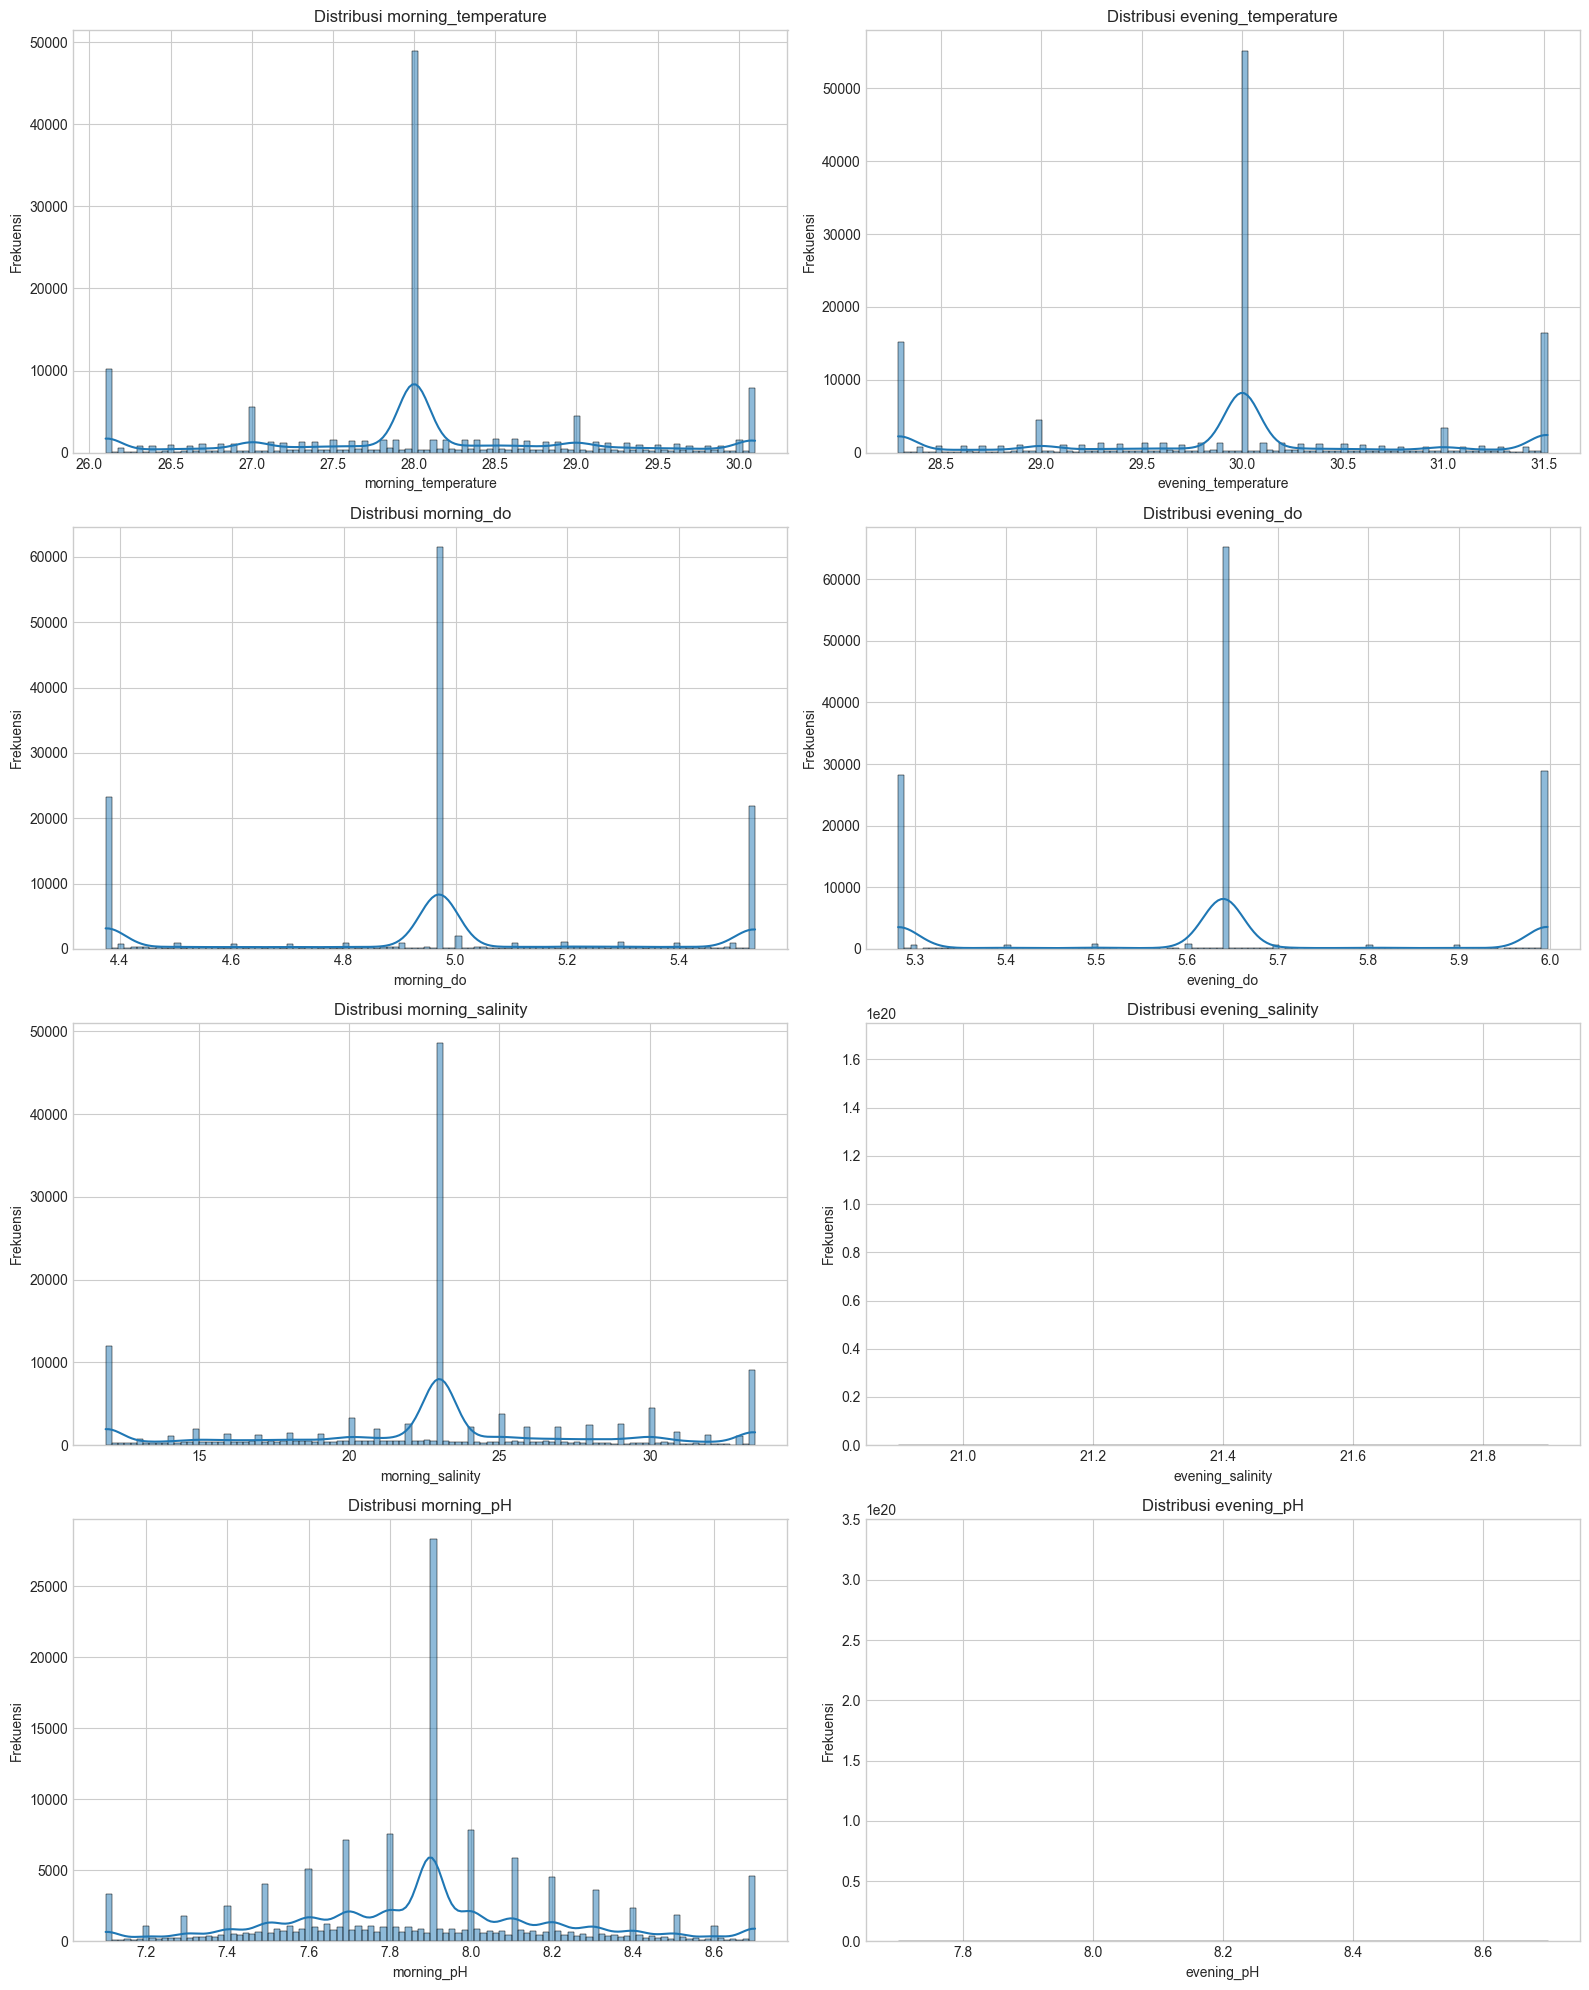

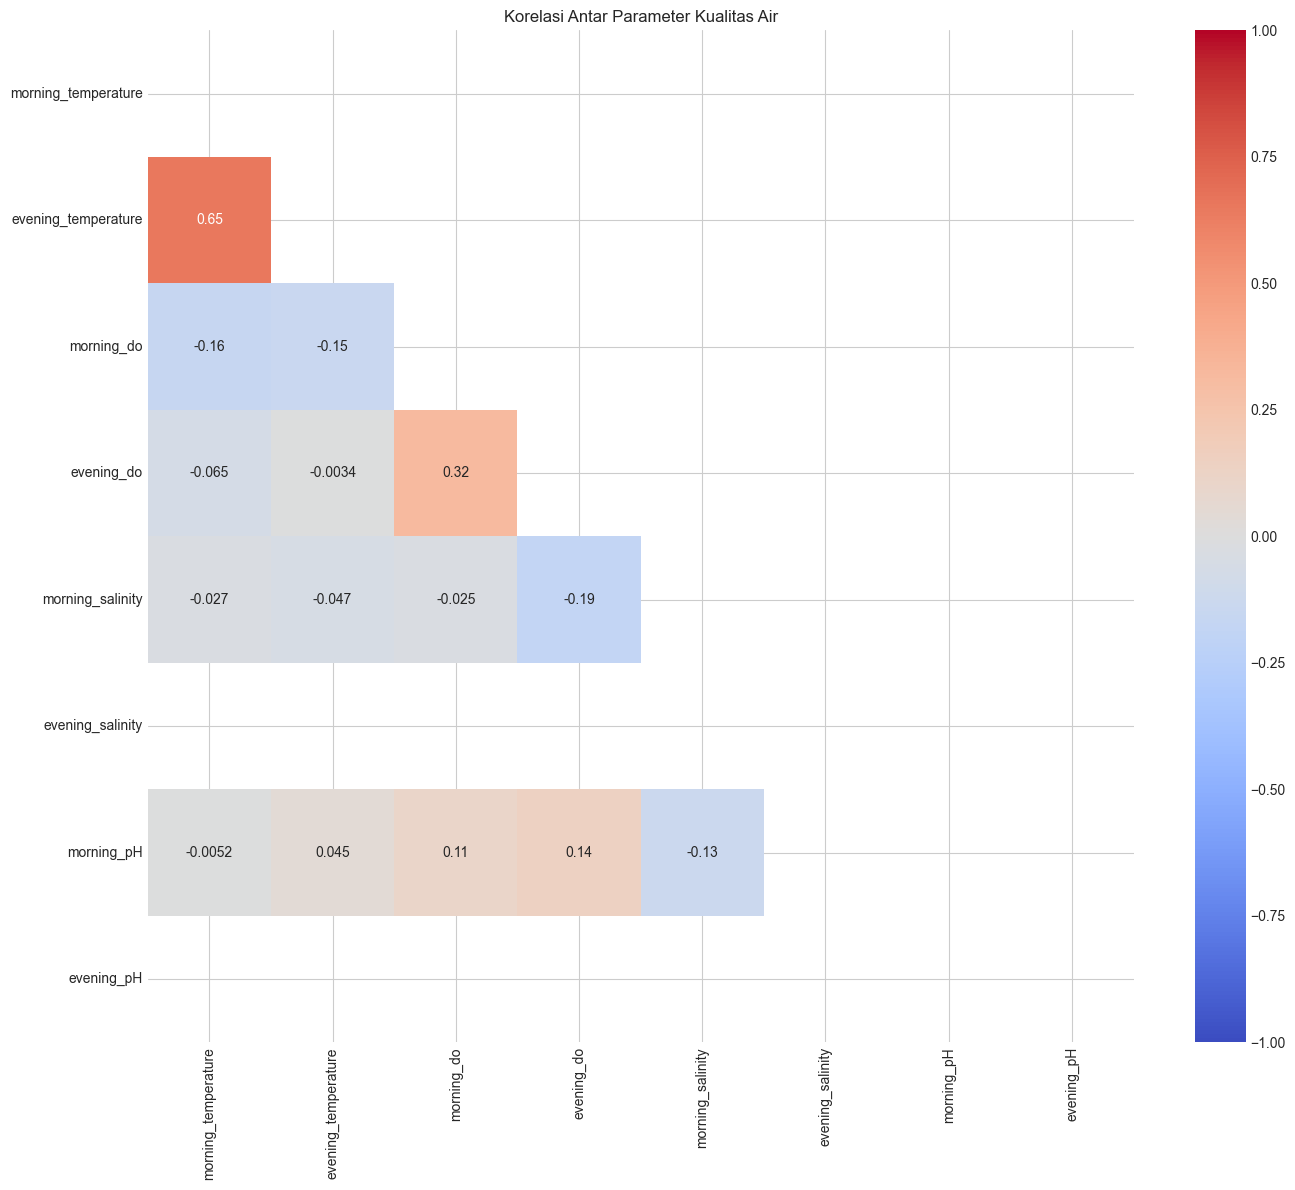

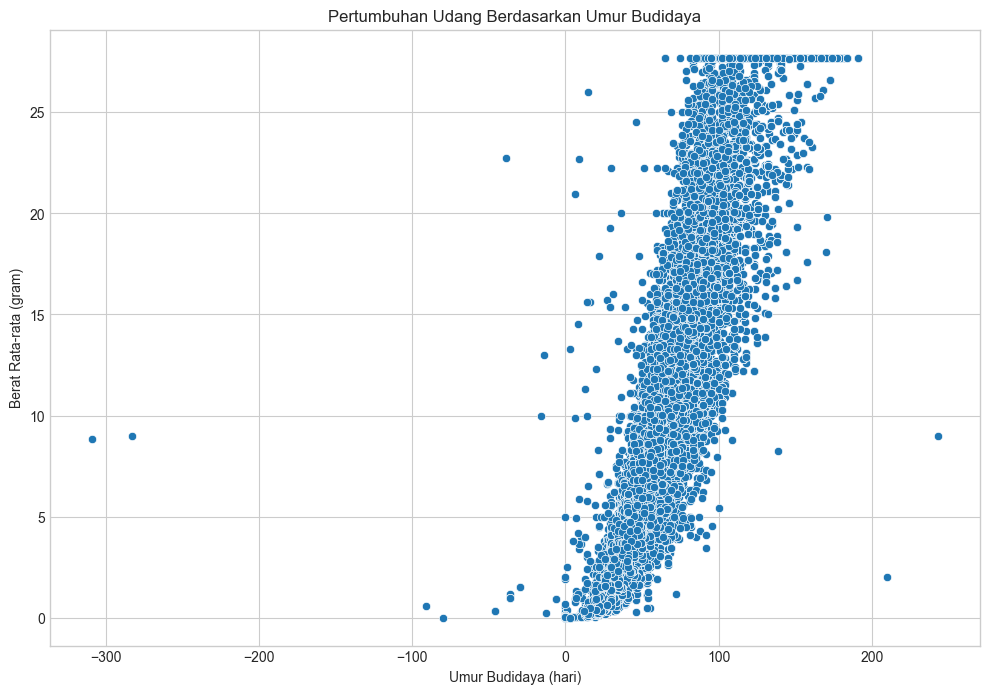

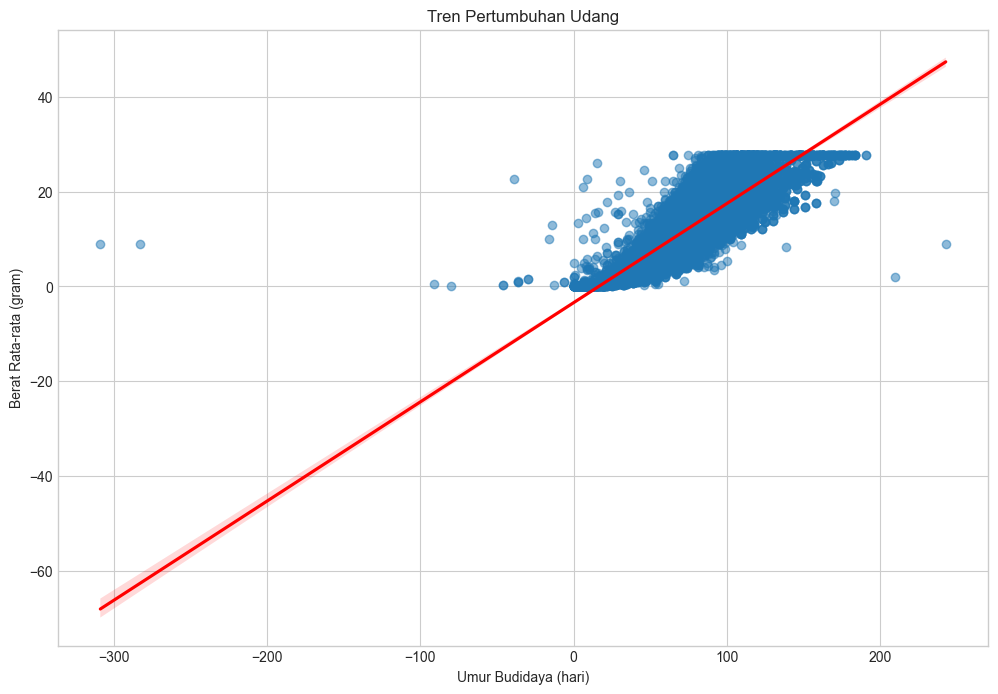

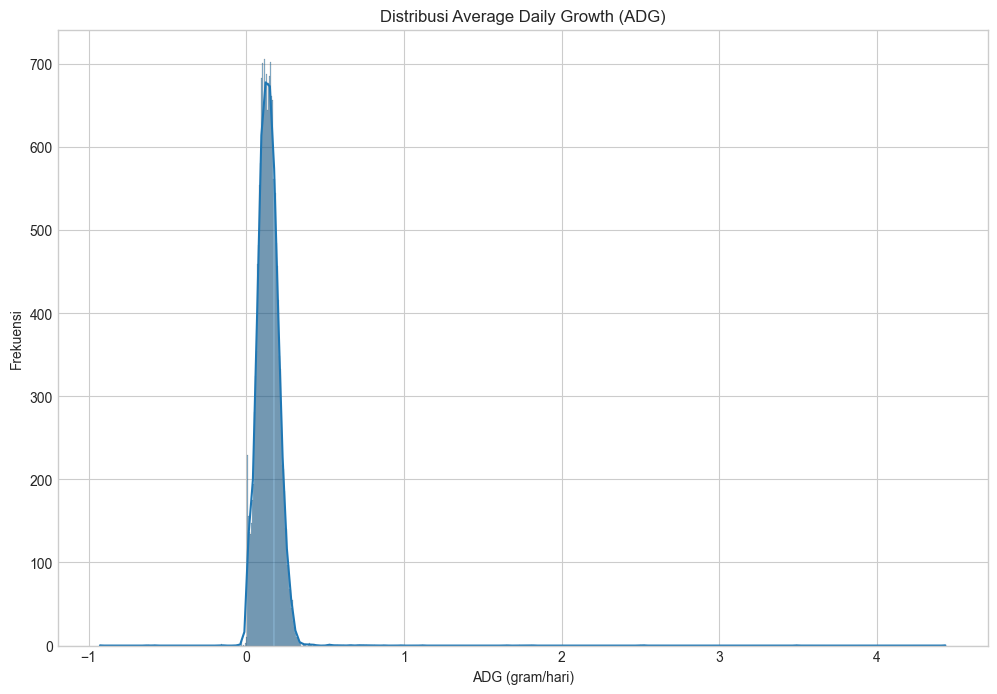

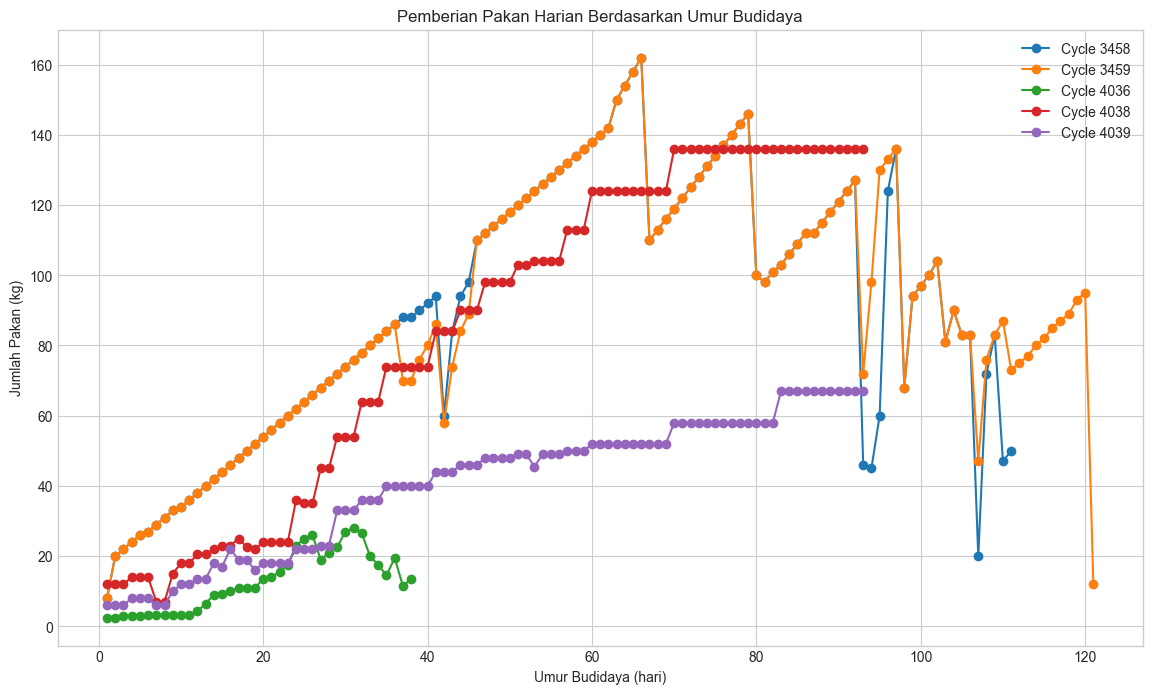

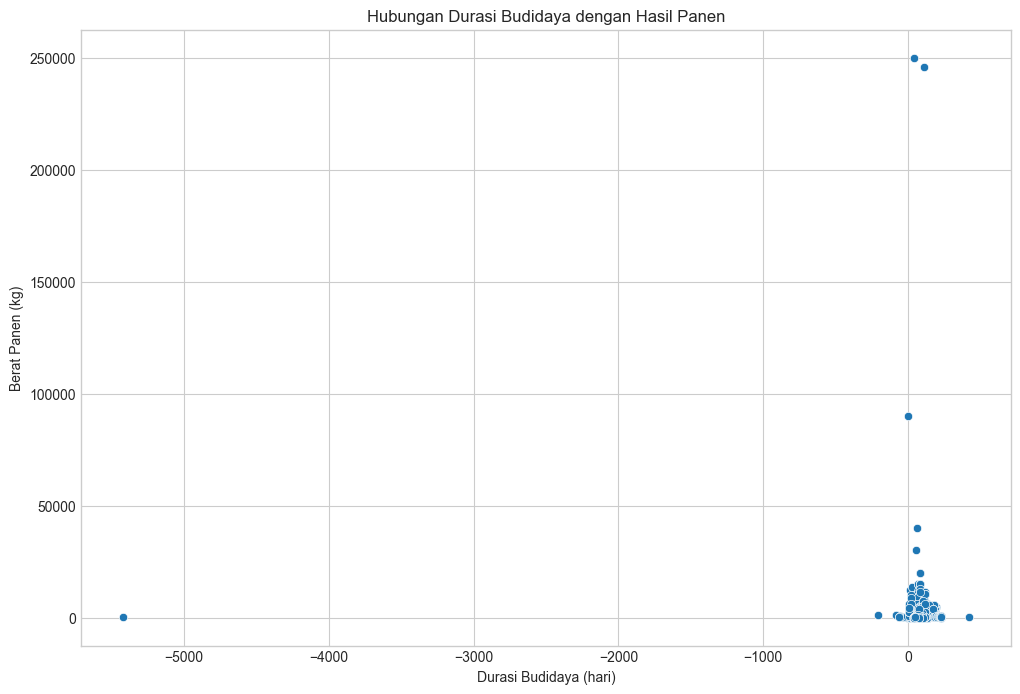

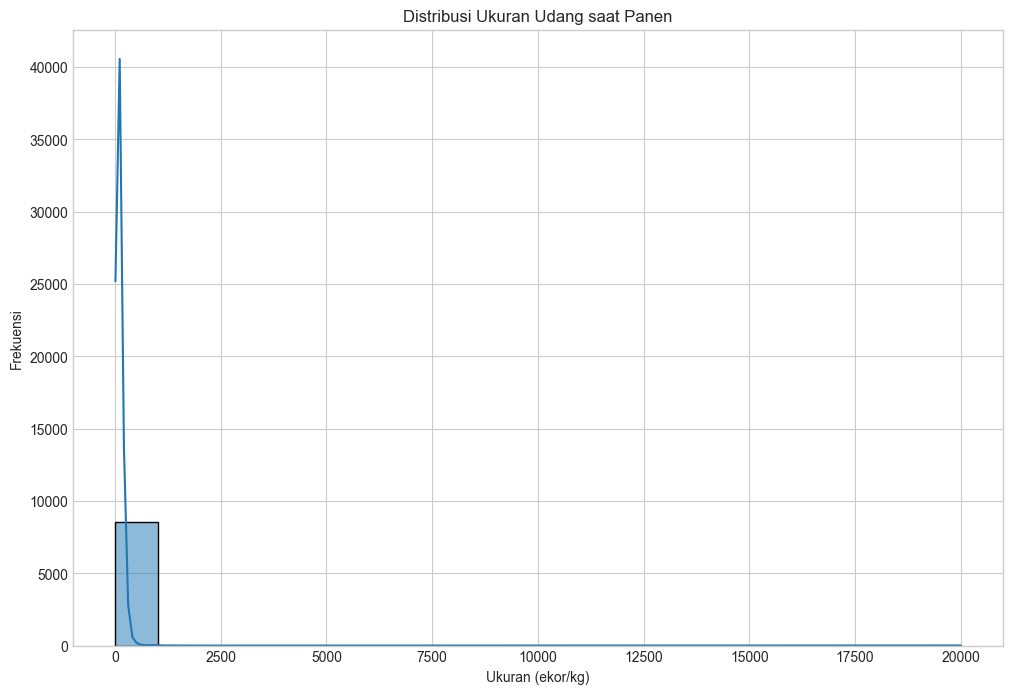

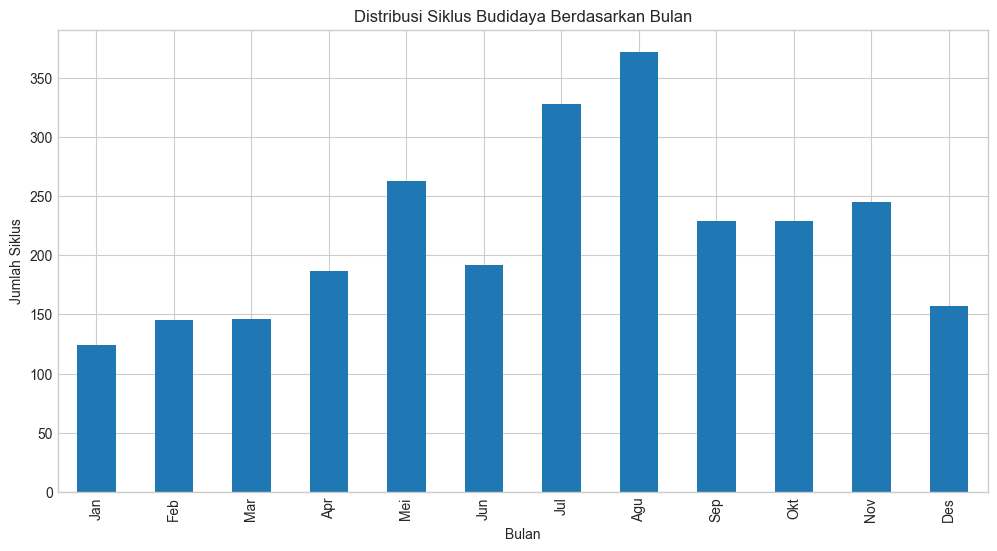

In [16]:
def perform_eda(datasets):
    print("\n" + "="*50)
    print("EXPLORATORY DATA ANALYSIS (EDA)")
    print("="*50)
    
    # 1. Visualisasi distribusi parameter kualitas air
    if 'measurements' in datasets and datasets['measurements'] is not None:
        measurements = datasets['measurements']
        
        # Plot distribusi parameter kualitas air
        params = ['morning_temperature', 'evening_temperature', 'morning_do', 'evening_do', 
                'morning_salinity', 'evening_salinity', 'morning_pH', 'evening_pH']
        
        fig, axes = plt.subplots(4, 2, figsize=(16, 20))
        axes = axes.flatten()
        
        for i, param in enumerate(params):
            if param in measurements.columns:
                sns.histplot(measurements[param].dropna(), kde=True, ax=axes[i])
                axes[i].set_title(f'Distribusi {param}')
                axes[i].set_xlabel(param)
                axes[i].set_ylabel('Frekuensi')
        
        plt.tight_layout()
        plt.show()
        
        # Korelasi antar parameter kualitas air
        plt.figure(figsize=(14, 12))
        water_params = measurements[params].copy()
        correlation = water_params.corr()
        mask = np.triu(np.ones_like(correlation, dtype=bool))
        sns.heatmap(correlation, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0)
        plt.title('Korelasi Antar Parameter Kualitas Air')
        plt.tight_layout()
        plt.show()
    
    # 2. Analisis pertumbuhan udang (dari sampling)
    if 'sampling' in datasets and datasets['sampling'] is not None and 'cycles' in datasets and datasets['cycles'] is not None:
        sampling = datasets['sampling']
        cycles = datasets['cycles']
        
        # Gabungkan data sampling dengan cycles
        if 'cycle_id' in sampling.columns and 'id' in cycles.columns:
            sampling_with_cycles = sampling.merge(cycles, left_on='cycle_id', right_on='id', how='left')
            
            # Hitung umur budidaya saat sampling
            if 'sampled_at' in sampling_with_cycles.columns and 'started_at' in sampling_with_cycles.columns:
                sampling_with_cycles['culture_days'] = (sampling_with_cycles['sampled_at'] - sampling_with_cycles['started_at']).dt.days
                
                # Plot pertumbuhan berdasarkan umur budidaya
                plt.figure(figsize=(12, 8))
                sns.scatterplot(data=sampling_with_cycles, x='culture_days', y='average_weight')
                plt.title('Pertumbuhan Udang Berdasarkan Umur Budidaya')
                plt.xlabel('Umur Budidaya (hari)')
                plt.ylabel('Berat Rata-rata (gram)')
                plt.grid(True)
                plt.show()
                
                # Plot trendline pertumbuhan
                plt.figure(figsize=(12, 8))
                sns.regplot(data=sampling_with_cycles, x='culture_days', y='average_weight', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
                plt.title('Tren Pertumbuhan Udang')
                plt.xlabel('Umur Budidaya (hari)')
                plt.ylabel('Berat Rata-rata (gram)')
                plt.grid(True)
                plt.show()
                
                # Distribusi Average Daily Growth (ADG)
                sampling_with_cycles['adg'] = sampling_with_cycles['average_weight'] / sampling_with_cycles['culture_days']
                
                plt.figure(figsize=(12, 8))
                sns.histplot(sampling_with_cycles['adg'].dropna(), kde=True)
                plt.title('Distribusi Average Daily Growth (ADG)')
                plt.xlabel('ADG (gram/hari)')
                plt.ylabel('Frekuensi')
                plt.grid(True)
                plt.show()
    
    # 3. Analisis pemberian pakan
    if 'feeds' in datasets and datasets['feeds'] is not None and 'cycles' in datasets and datasets['cycles'] is not None:
        feeds = datasets['feeds']
        cycles = datasets['cycles']
        
        # Gabungkan data feeds dengan cycles
        if 'cycle_id' in feeds.columns and 'id' in cycles.columns:
            feeds_with_cycles = feeds.merge(cycles, left_on='cycle_id', right_on='id', how='left')
            
            # Hitung umur budidaya saat pemberian pakan
            if 'logged_at' in feeds_with_cycles.columns and 'started_at' in feeds_with_cycles.columns:
                feeds_with_cycles['culture_days'] = (feeds_with_cycles['logged_at'] - feeds_with_cycles['started_at']).dt.days
                
                # Agregasi jumlah pakan per hari budidaya
                daily_feed = feeds_with_cycles.groupby(['cycle_id', 'culture_days'])['quantity'].sum().reset_index()
                
                # Plot pemberian pakan berdasarkan umur budidaya untuk beberapa siklus pertama
                plt.figure(figsize=(14, 8))
                for cycle_id in daily_feed['cycle_id'].unique()[:5]:  # Ambil 5 siklus pertama
                    cycle_data = daily_feed[daily_feed['cycle_id'] == cycle_id]
                    plt.plot(cycle_data['culture_days'], cycle_data['quantity'], marker='o', linestyle='-', label=f'Cycle {cycle_id}')
                
                plt.title('Pemberian Pakan Harian Berdasarkan Umur Budidaya')
                plt.xlabel('Umur Budidaya (hari)')
                plt.ylabel('Jumlah Pakan (kg)')
                plt.legend()
                plt.grid(True)
                plt.show()
    
    # 4. Analisis hasil panen (jika data harvests tersedia)
    if 'harvests' in datasets and datasets['harvests'] is not None and 'cycles' in datasets and datasets['cycles'] is not None:
        harvests = datasets['harvests']
        cycles = datasets['cycles']
        
        # Gabungkan data harvests dengan cycles
        if 'cycle_id' in harvests.columns and 'id' in cycles.columns:
            harvests_with_cycles = harvests.merge(cycles, left_on='cycle_id', right_on='id', how='left')
            
            # Hitung durasi budidaya
            if 'harvested_at' in harvests_with_cycles.columns and 'started_at' in harvests_with_cycles.columns:
                harvests_with_cycles['culture_duration'] = (harvests_with_cycles['harvested_at'] - harvests_with_cycles['started_at']).dt.days
                
                # Plot hubungan antara durasi budidaya dan hasil panen
                plt.figure(figsize=(12, 8))
                sns.scatterplot(data=harvests_with_cycles, x='culture_duration', y='weight')
                plt.title('Hubungan Durasi Budidaya dengan Hasil Panen')
                plt.xlabel('Durasi Budidaya (hari)')
                plt.ylabel('Berat Panen (kg)')
                plt.grid(True)
                plt.show()
                
                # Distribusi ukuran udang saat panen
                plt.figure(figsize=(12, 8))
                sns.histplot(harvests_with_cycles['size'].dropna(), kde=True, bins=20)
                plt.title('Distribusi Ukuran Udang saat Panen')
                plt.xlabel('Ukuran (ekor/kg)')
                plt.ylabel('Frekuensi')
                plt.grid(True)
                plt.show()
    
    # 5. Deteksi tren musiman (jika data cukup untuk analisis musiman)
    if 'cycles' in datasets and datasets['cycles'] is not None:
        cycles = datasets['cycles']
        
        # Ekstrak bulan mulai budidaya
        if 'started_at' in cycles.columns:
            cycles['start_month'] = cycles['started_at'].dt.month
            
            # Plot distribusi siklus budidaya berdasarkan bulan
            plt.figure(figsize=(12, 6))
            month_order = range(1, 13)  # 1-12 untuk bulan
            monthly_counts = cycles['start_month'].value_counts().reindex(month_order).fillna(0)
            monthly_counts.plot(kind='bar')
            plt.title('Distribusi Siklus Budidaya Berdasarkan Bulan')
            plt.xlabel('Bulan')
            plt.ylabel('Jumlah Siklus')
            plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
            plt.grid(True, axis='y')
            plt.show()
    
    return None

# Melakukan EDA
perform_eda(datasets_fixed)

Feature Engineering dan Perhitungan Metrik Kunci


FEATURE ENGINEERING & PERHITUNGAN METRIK KUNCI
Dataset utama dibuat dengan 2617 baris dan 39 kolom
Durasi siklus budidaya: Min=5 hari, Max=819 hari, Rata-rata=81.0 hari
Kepadatan tebar: Min=0 ekor/m², Max=159250 ekor/m², Rata-rata=576.9 ekor/m²
Distribusi musim: {'Kemarau': 1571, 'Hujan': 1046}
Survival Rate: Min=5.0%, Max=100.0%, Rata-rata=57.4%


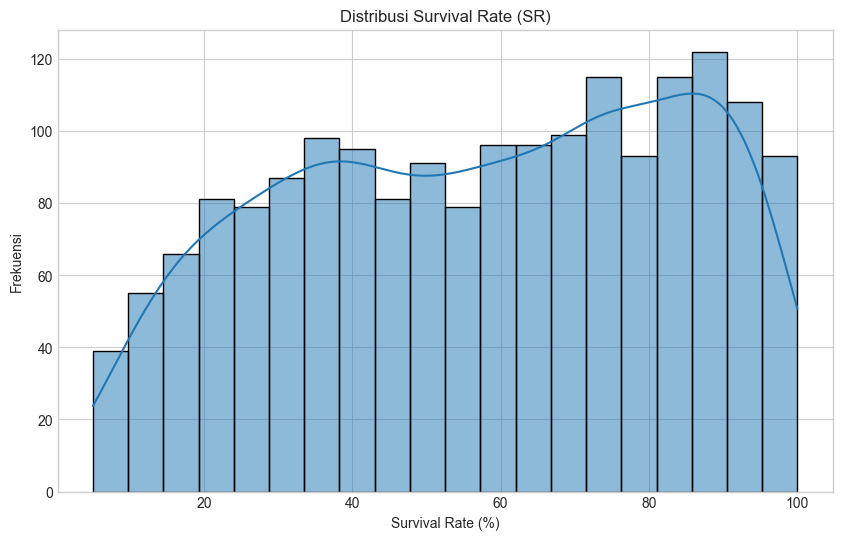

Average Daily Gain: Min=0.002 g/hari, Max=inf g/hari, Rata-rata=inf g/hari


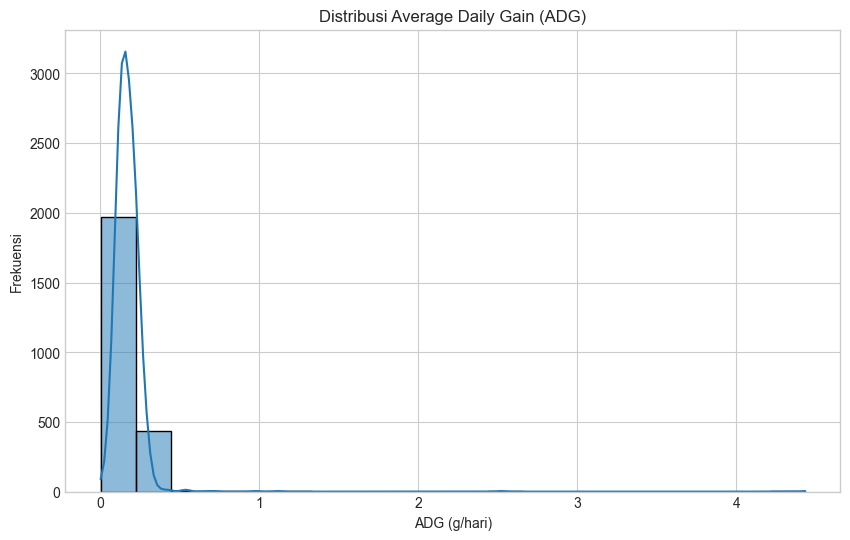

Feed Conversion Ratio: Min=0.50, Max=3.00, Rata-rata=1.60


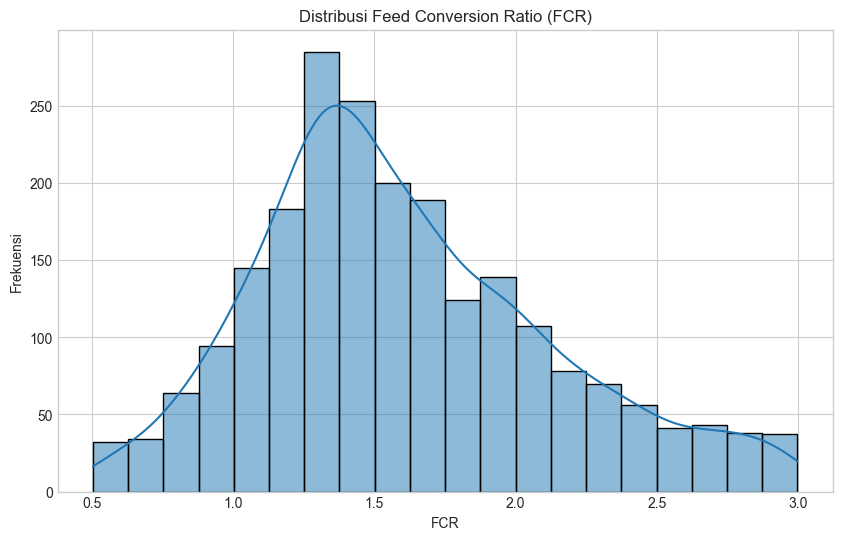

Fluktuasi Suhu Harian: Min=0.01°C, Max=4.26°C, Rata-rata=1.91°C

Kolom-kolom di dataframe utama:
['id', 'pond_id', 'species_id', 'total_seed', 'started_at', 'finished_at', 'remark', 'created_at_x', 'updated_at_x', 'area', 'initial_age', 'limit_weight_per_area', 'target_cultivation_day', 'target_size', 'extracted_at_x', 'subscription_type', 'ordered_at', 'hatchery_id', 'total_seed_type', 'hatchery_name', 'pond_name', 'pond_length', 'pond_width', 'pond_depth', 'start_month', 'id_pond', 'farm_id', 'length', 'width', 'deep', 'created_at_y', 'updated_at_y', 'record_id', 'extracted_at_y', 'max_seed_density', 'id_farm', 'province', 'regency', 'timezone', 'culture_duration', 'stocking_density', 'start_quarter', 'season', 'cycle_id_x', 'weight', 'size', 'harvested_at', 'abw_harvest', 'harvested_count', 'survival_rate', 'cycle_id_last_sampling', 'average_weight', 'days_from_start', 'adg', 'cycle_id_feed', 'total_feed', 'fcr', 'cycle_id_y', 'morning_temperature_mean', 'morning_temperature_min', '

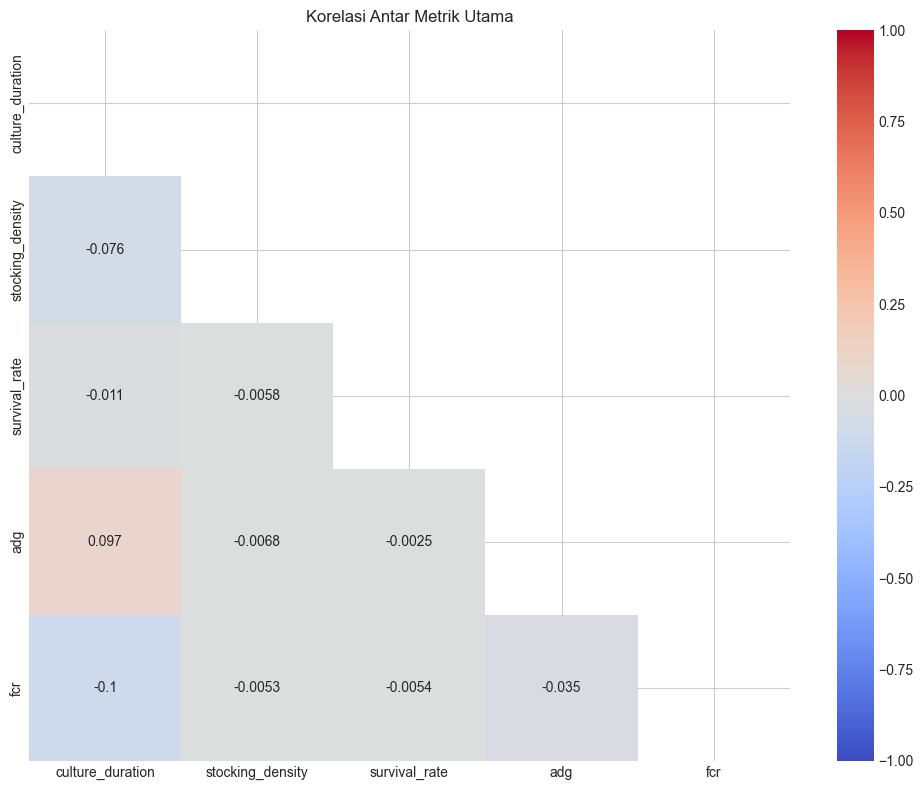

In [17]:
# Fungsi untuk feature engineering dan perhitungan metrik kunci
def feature_engineering(datasets):
    print("\n" + "="*50)
    print("FEATURE ENGINEERING & PERHITUNGAN METRIK KUNCI")
    print("="*50)
    
    # Buat salinan dataset
    datasets_enriched = {k: v.copy() if v is not None else None for k, v in datasets.items()}
    
    # 1. Gabungkan data utama (cycles, ponds, farms)
    if all(key in datasets_enriched and datasets_enriched[key] is not None for key in ['cycles', 'ponds', 'farms']):
        cycles = datasets_enriched['cycles']
        ponds = datasets_enriched['ponds']
        farms = datasets_enriched['farms']
        
        # Gabungkan ponds dengan farms
        ponds_with_farms = ponds.merge(farms, left_on='farm_id', right_on='id', how='left', suffixes=('_pond', '_farm'))
        
        # Gabungkan cycles dengan ponds dan farms
        main_df = cycles.merge(ponds_with_farms, left_on='pond_id', right_on='id_pond', how='left')
        
        print(f"Dataset utama dibuat dengan {len(main_df)} baris dan {main_df.shape[1]} kolom")
        
        # 2. Hitung durasi siklus budidaya
        if 'started_at' in main_df.columns and 'finished_at' in main_df.columns:
            main_df['culture_duration'] = (main_df['finished_at'] - main_df['started_at']).dt.days
            
            # Handle kasus dimana finished_at belum terisi (siklus masih berjalan)
            main_df.loc[main_df['culture_duration'].isna(), 'culture_duration'] = \
                (pd.Timestamp.now() - main_df.loc[main_df['culture_duration'].isna(), 'started_at']).dt.days
            
            print(f"Durasi siklus budidaya: Min={main_df['culture_duration'].min():.0f} hari, "
                  f"Max={main_df['culture_duration'].max():.0f} hari, "
                  f"Rata-rata={main_df['culture_duration'].mean():.1f} hari")
        
        # 3. Hitung kepadatan tebar (stocking density)
        if all(col in main_df.columns for col in ['total_seed', 'area']):
            main_df['stocking_density'] = main_df['total_seed'] / main_df['area']
            print(f"Kepadatan tebar: Min={main_df['stocking_density'].min():.0f} ekor/m², "
                  f"Max={main_df['stocking_density'].max():.0f} ekor/m², "
                  f"Rata-rata={main_df['stocking_density'].mean():.1f} ekor/m²")
        
        # 4. Tambahkan fitur musiman
        if 'started_at' in main_df.columns:
            # Ekstrak bulan dan musim
            main_df['start_month'] = main_df['started_at'].dt.month
            main_df['start_quarter'] = main_df['started_at'].dt.quarter
            
            # Untuk Indonesia, bisa membagi menjadi musim hujan (Oktober-Maret) dan kemarau (April-September)
            main_df['season'] = main_df['start_month'].apply(
                lambda x: 'Hujan' if x >= 10 or x <= 3 else 'Kemarau')
            
            print(f"Distribusi musim: {main_df['season'].value_counts().to_dict()}")
        
        # 5. Gabungkan dengan data panen (harvests)
        if 'harvests' in datasets_enriched and datasets_enriched['harvests'] is not None:
            harvests = datasets_enriched['harvests']
            if 'cycle_id' in harvests.columns:
                # Agregasi data panen berdasarkan cycle_id (mungkin ada beberapa record panen per siklus)
                harvest_agg = harvests.groupby('cycle_id').agg({
                    'weight': 'sum',
                    'size': 'mean',
                    'harvested_at': 'max'  # tanggal panen terakhir
                }).reset_index()
                
                # Gabungkan dengan dataframe utama
                main_df = main_df.merge(harvest_agg, left_on='id', right_on='cycle_id', how='left')
                
                # 6. Hitung Survival Rate (SR)
                if all(col in main_df.columns for col in ['weight', 'size', 'total_seed']):
                    # SR = (total biomass / ABW) / jumlah tebar awal * 100%
                    # ABW = 1000 / size (karena size dalam ekor/kg)
                    main_df['abw_harvest'] = 1000 / main_df['size']  # dalam gram
                    main_df['harvested_count'] = (main_df['weight'] * 1000) / main_df['abw_harvest']
                    main_df['survival_rate'] = (main_df['harvested_count'] / main_df['total_seed']) * 100
                    
                    # Filter untuk menghilangkan nilai SR yang tidak masuk akal (>100% atau terlalu rendah)
                    valid_sr = main_df[(main_df['survival_rate'] <= 100) & (main_df['survival_rate'] > 5)]
                    
                    print(f"Survival Rate: Min={valid_sr['survival_rate'].min():.1f}%, "
                          f"Max={valid_sr['survival_rate'].max():.1f}%, "
                          f"Rata-rata={valid_sr['survival_rate'].mean():.1f}%")
                    
                    # Visualisasi distribusi SR
                    plt.figure(figsize=(10, 6))
                    sns.histplot(valid_sr['survival_rate'].dropna(), kde=True, bins=20)
                    plt.title('Distribusi Survival Rate (SR)')
                    plt.xlabel('Survival Rate (%)')
                    plt.ylabel('Frekuensi')
                    plt.grid(True)
                    plt.show()
        
        # 7. Gabungkan dengan data sampling
        if 'sampling' in datasets_enriched and datasets_enriched['sampling'] is not None:
            sampling = datasets_enriched['sampling']
            if 'cycle_id' in sampling.columns and 'sampled_at' in sampling.columns and 'average_weight' in sampling.columns:
                # Untuk setiap siklus, ambil sampling terakhir
                sampling['days_from_start'] = sampling.apply(
                    lambda row: (row['sampled_at'] - main_df.loc[main_df['id'] == row['cycle_id'], 'started_at'].values[0]).days
                    if row['cycle_id'] in main_df['id'].values else np.nan, 
                    axis=1
                )
                
                # Kelompokkan berdasarkan cycle_id dan ambil data terakhir
                last_sampling = sampling.sort_values('sampled_at').groupby('cycle_id').last().reset_index()
                
                # Gabungkan dengan dataframe utama
                main_df = main_df.merge(last_sampling[['cycle_id', 'average_weight', 'days_from_start']], 
                                       left_on='id', right_on='cycle_id', how='left',
                                       suffixes=('', '_last_sampling'))
                
                # 8. Hitung Average Daily Gain (ADG)
                if 'average_weight' in main_df.columns and 'days_from_start' in main_df.columns:
                    main_df['adg'] = main_df['average_weight'] / main_df['days_from_start']
                    
                    # Filter untuk nilai ADG yang masuk akal
                    valid_adg = main_df[main_df['adg'] > 0]
                    
                    print(f"Average Daily Gain: Min={valid_adg['adg'].min():.3f} g/hari, "
                          f"Max={valid_adg['adg'].max():.3f} g/hari, "
                          f"Rata-rata={valid_adg['adg'].mean():.3f} g/hari")
                    
                    # Visualisasi distribusi ADG
                    plt.figure(figsize=(10, 6))
                    sns.histplot(valid_adg['adg'].dropna(), kde=True, bins=20)
                    plt.title('Distribusi Average Daily Gain (ADG)')
                    plt.xlabel('ADG (g/hari)')
                    plt.ylabel('Frekuensi')
                    plt.grid(True)
                    plt.show()
        
        # 9. Gabungkan dengan data pemberian pakan (feeds)
        if 'feeds' in datasets_enriched and datasets_enriched['feeds'] is not None:
            feeds = datasets_enriched['feeds']
            if 'cycle_id' in feeds.columns and 'quantity' in feeds.columns:
                # Agregasi jumlah pakan per siklus
                feeds_agg = feeds.groupby('cycle_id')['quantity'].sum().reset_index()
                feeds_agg.rename(columns={'quantity': 'total_feed'}, inplace=True)
                
                # Gabungkan dengan dataframe utama
                main_df = main_df.merge(feeds_agg, left_on='id', right_on='cycle_id', how='left', suffixes=('', '_feed'))
                
                # 10. Hitung Feed Conversion Ratio (FCR)
                if all(col in main_df.columns for col in ['total_feed', 'weight']):
                    main_df['fcr'] = main_df['total_feed'] / main_df['weight']
                    
                    # Filter untuk nilai FCR yang masuk akal
                    valid_fcr = main_df[(main_df['fcr'] > 0.5) & (main_df['fcr'] < 3)]
                    
                    print(f"Feed Conversion Ratio: Min={valid_fcr['fcr'].min():.2f}, "
                          f"Max={valid_fcr['fcr'].max():.2f}, "
                          f"Rata-rata={valid_fcr['fcr'].mean():.2f}")
                    
                    # Visualisasi distribusi FCR
                    plt.figure(figsize=(10, 6))
                    sns.histplot(valid_fcr['fcr'].dropna(), kde=True, bins=20)
                    plt.title('Distribusi Feed Conversion Ratio (FCR)')
                    plt.xlabel('FCR')
                    plt.ylabel('Frekuensi')
                    plt.grid(True)
                    plt.show()
        
        # 11. Gabungkan dengan data kualitas air
        if 'measurements' in datasets_enriched and datasets_enriched['measurements'] is not None:
            measurements = datasets_enriched['measurements']
            if 'cycle_id' in measurements.columns:
                # Agregasi pengukuran kualitas air untuk setiap parameter per siklus
                water_params = ['morning_temperature', 'evening_temperature', 'morning_do', 'evening_do', 
                              'morning_salinity', 'evening_salinity', 'morning_pH', 'evening_pH']
                
                # Hitung rata-rata, min, max, dan standar deviasi untuk setiap parameter
                agg_dict = {}
                for param in water_params:
                    if param in measurements.columns:
                        agg_dict[param] = ['mean', 'min', 'max', 'std']
                
                if agg_dict:
                    water_quality_agg = measurements.groupby('cycle_id').agg(agg_dict)
                    
                    # Flatten column multi-index
                    water_quality_agg.columns = ['_'.join(col).strip() for col in water_quality_agg.columns.values]
                    water_quality_agg.reset_index(inplace=True)
                    
                    # Gabungkan dengan dataframe utama
                    main_df = main_df.merge(water_quality_agg, left_on='id', right_on='cycle_id', how='left')
                    
                    # 12. Hitung fitur kestabilan parameter kualitas air
                    # Contoh: variabilitas harian suhu
                    if 'morning_temperature_mean' in main_df.columns and 'evening_temperature_mean' in main_df.columns:
                        main_df['temp_daily_fluctuation'] = abs(main_df['morning_temperature_mean'] - main_df['evening_temperature_mean'])
                        print(f"Fluktuasi Suhu Harian: Min={main_df['temp_daily_fluctuation'].min():.2f}°C, "
                              f"Max={main_df['temp_daily_fluctuation'].max():.2f}°C, "
                              f"Rata-rata={main_df['temp_daily_fluctuation'].mean():.2f}°C")
        
        # 13. Tambahkan fitur ukuran dan karakteristik kolam
        if all(col in main_df.columns for col in ['length_pond', 'width_pond', 'deep_pond']):
            # Hitung volume kolam
            main_df['pond_volume'] = main_df['length_pond'] * main_df['width_pond'] * main_df['deep_pond']
            
            # Hitung rasio luas permukaan terhadap volume
            main_df['surface_to_volume_ratio'] = (main_df['length_pond'] * main_df['width_pond']) / main_df['pond_volume']
            
            print(f"Volume Kolam: Min={main_df['pond_volume'].min():.1f} m³, "
                  f"Max={main_df['pond_volume'].max():.1f} m³, "
                  f"Rata-rata={main_df['pond_volume'].mean():.1f} m³")
        
        # Simpan dataframe utama yang sudah diperkaya
        datasets_enriched['main_df'] = main_df
        
        # Tampilkan kolom-kolom yang tersedia di dataframe utama
        print("\nKolom-kolom di dataframe utama:")
        print(main_df.columns.tolist())
        
        # Tampilkan statistik deskriptif untuk kolom numerik utama
        numeric_cols = ['culture_duration', 'stocking_density', 'survival_rate', 'adg', 'fcr']
        numeric_cols = [col for col in numeric_cols if col in main_df.columns]
        
        if numeric_cols:
            print("\nStatistik deskriptif untuk metrik utama:")
            print(main_df[numeric_cols].describe())
        
        # Visualisasi korelasi antar metrik utama
        if len(numeric_cols) > 1:
            plt.figure(figsize=(10, 8))
            correlation = main_df[numeric_cols].corr()
            mask = np.triu(np.ones_like(correlation, dtype=bool))
            sns.heatmap(correlation, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0)
            plt.title('Korelasi Antar Metrik Utama')
            plt.tight_layout()
            plt.show()
    
    return datasets_enriched

# Lakukan feature engineering
datasets_enriched = feature_engineering(datasets_fixed)

Analisis Hubungan dan Agregasi Data Tambahan


ANALISIS HUBUNGAN DAN AGREGASI DATA TAMBAHAN


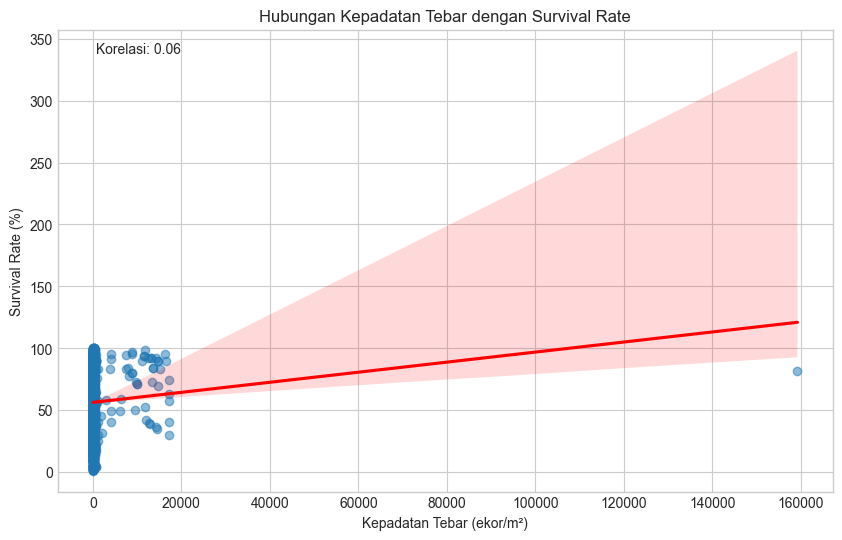

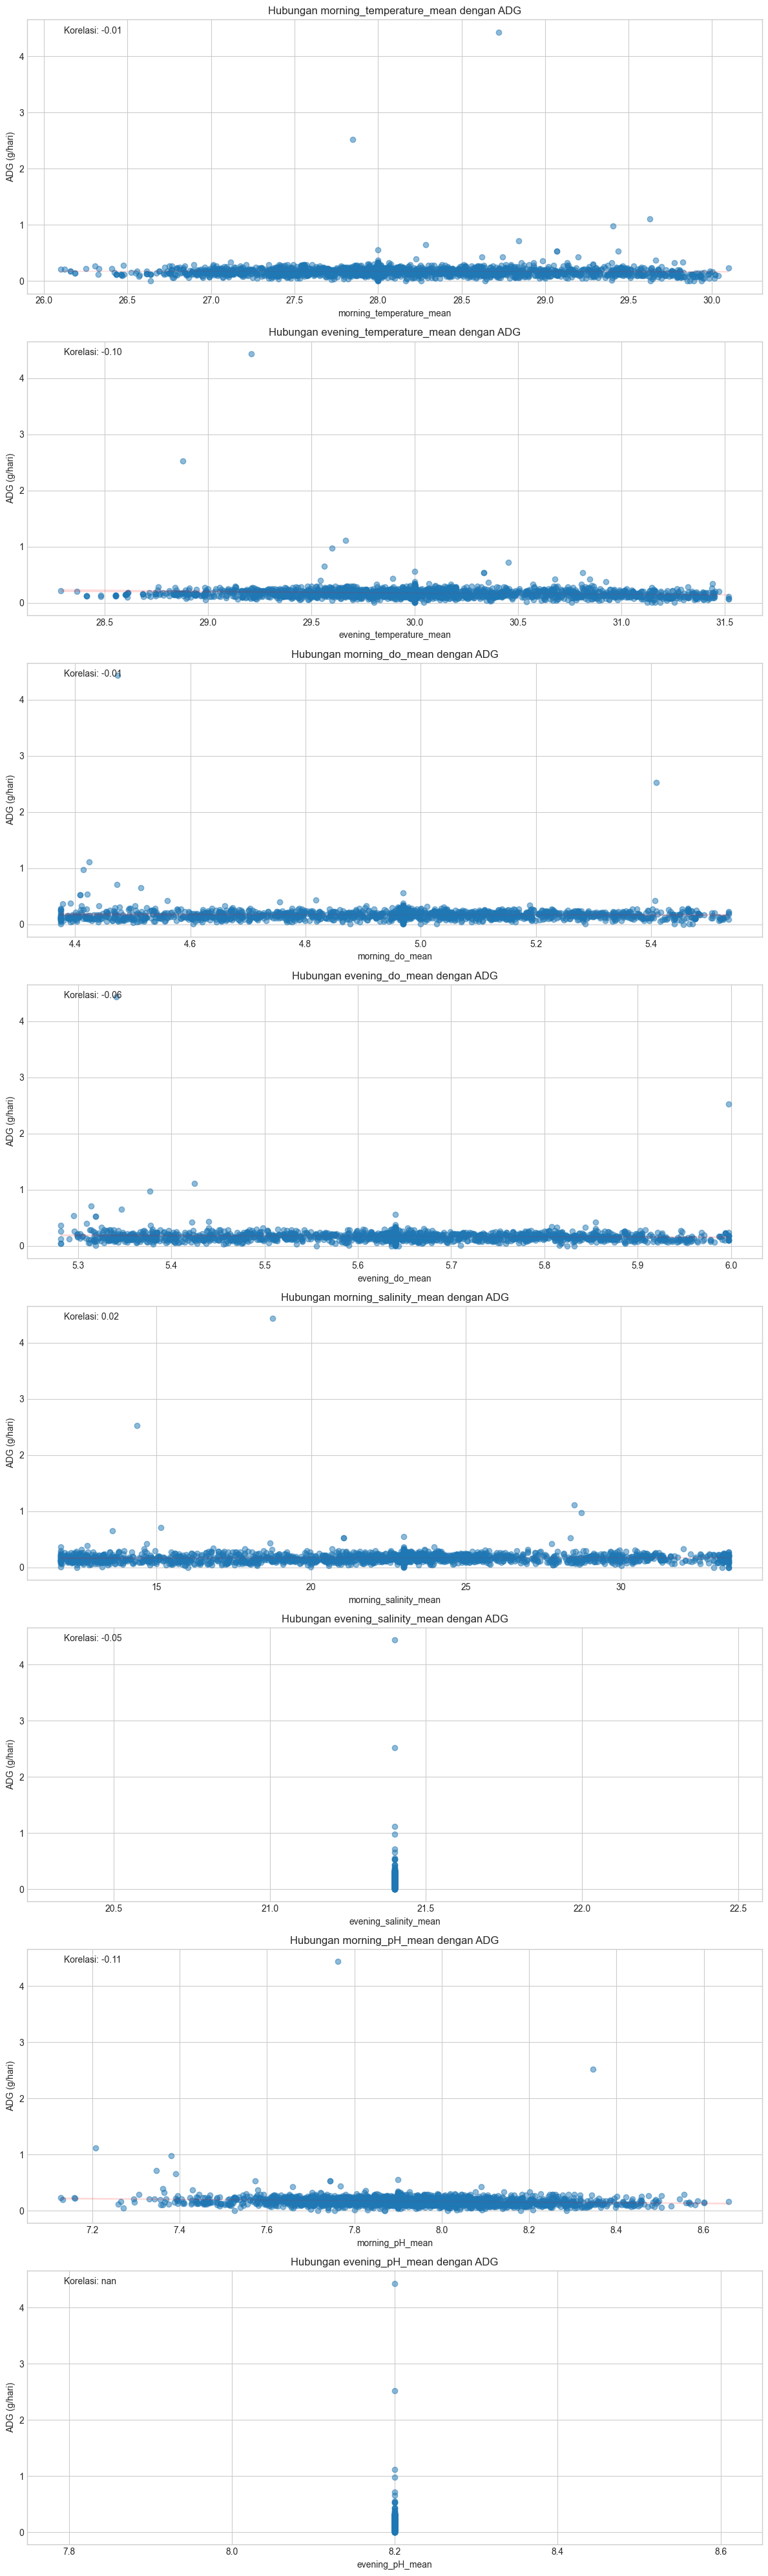

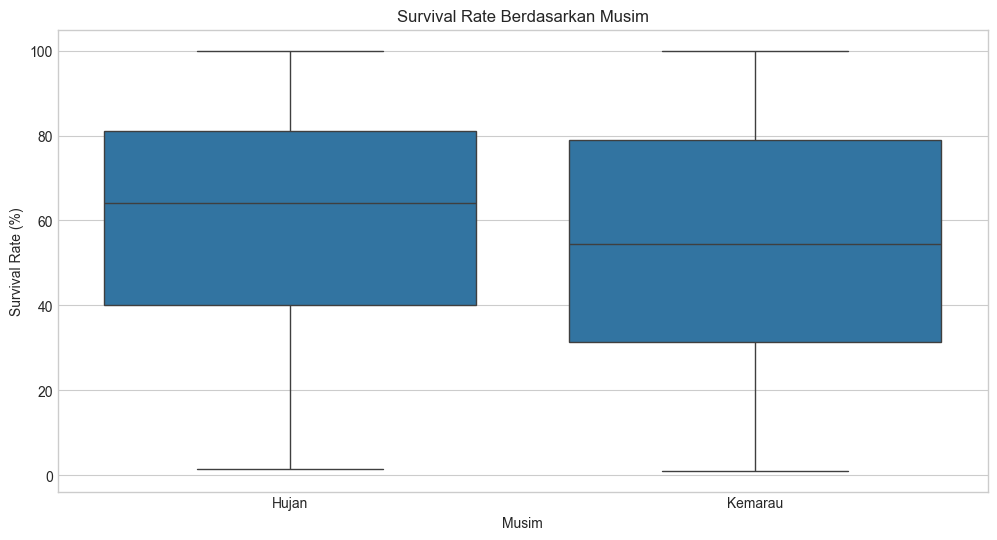

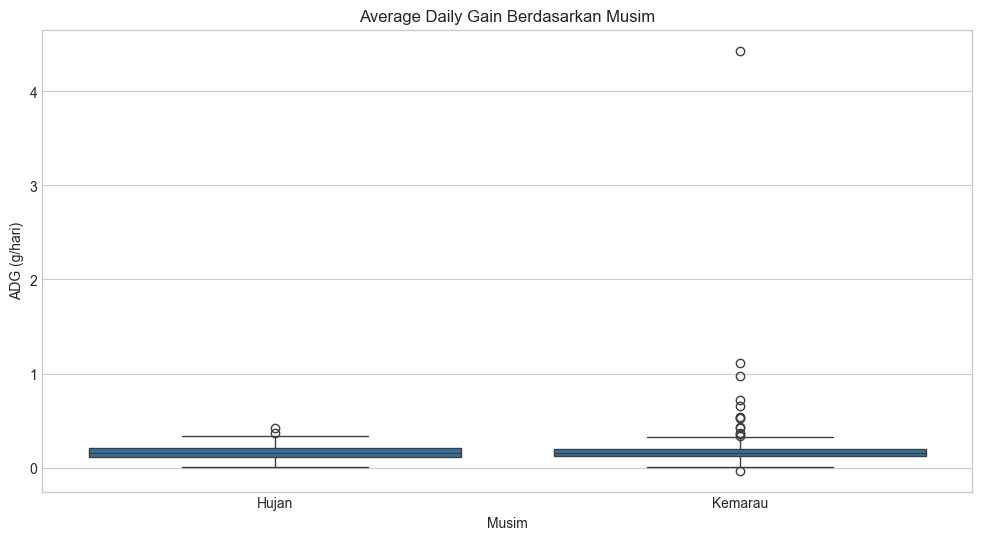

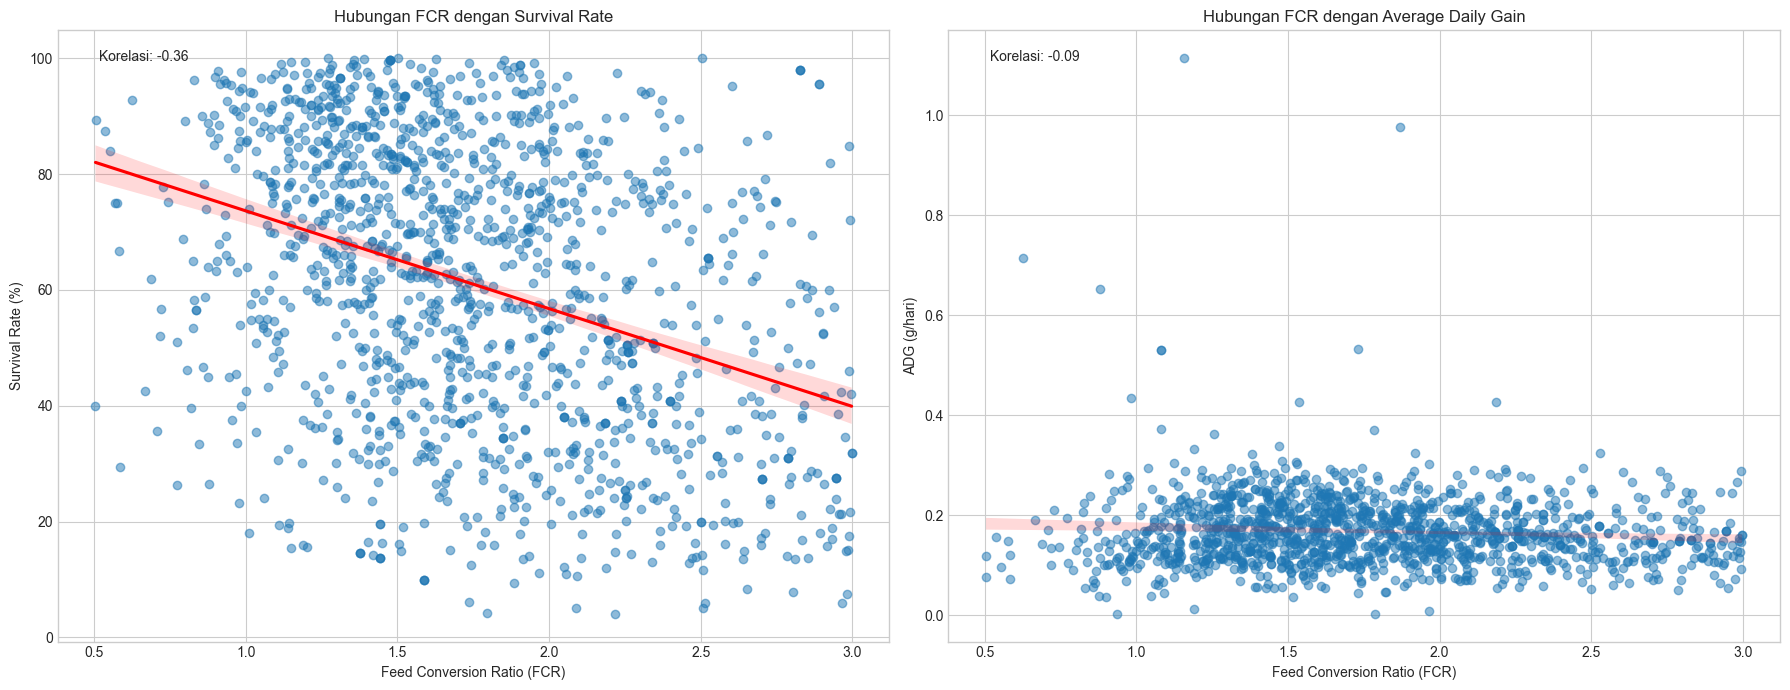

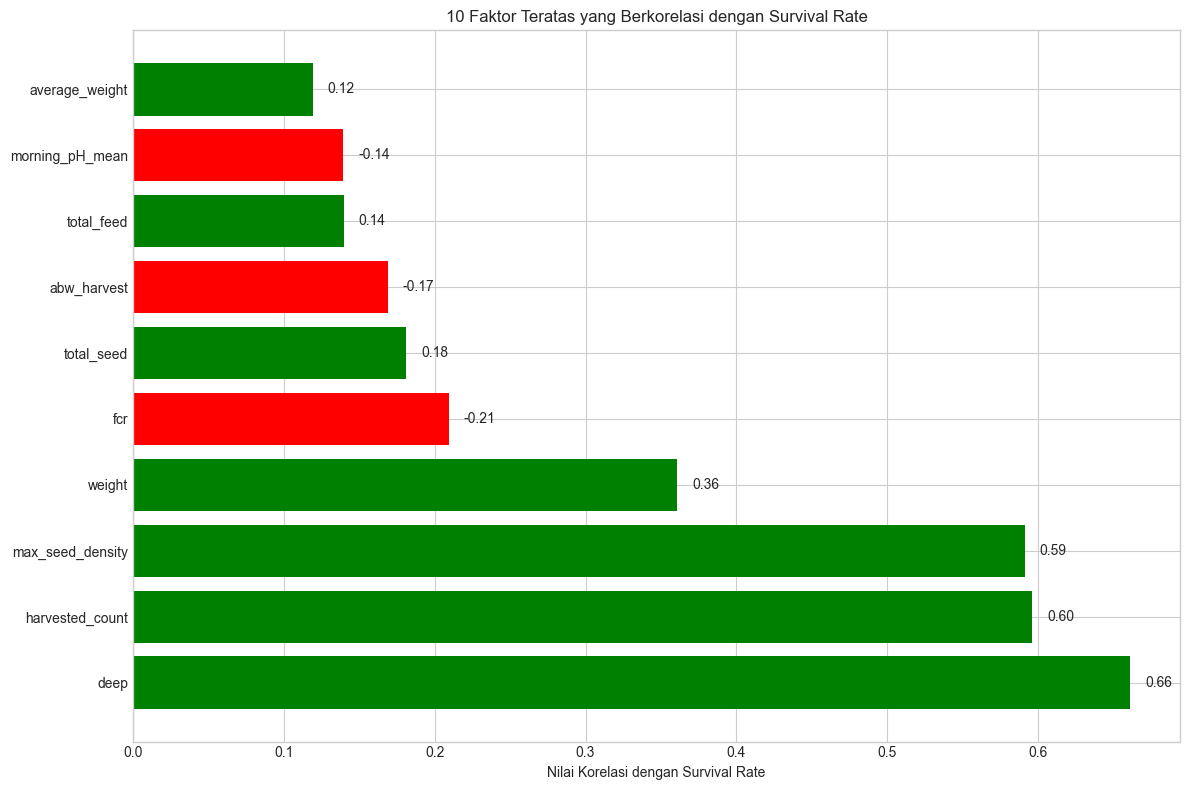

10 Faktor Teratas yang Berkorelasi dengan Survival Rate:
1. deep: 0.661
2. harvested_count: 0.596
3. max_seed_density: 0.591
4. weight: 0.361
5. fcr: -0.209
6. total_seed: 0.181
7. abw_harvest: -0.169
8. total_feed: 0.140
9. morning_pH_mean: -0.139
10. average_weight: 0.119


In [18]:
# Fungsi untuk menganalisis hubungan dan membuat agregasi tambahan
def analyze_relationships(datasets_enriched):
    print("\n" + "="*50)
    print("ANALISIS HUBUNGAN DAN AGREGASI DATA TAMBAHAN")
    print("="*50)
    
    if 'main_df' not in datasets_enriched or datasets_enriched['main_df'] is None:
        print("Dataset utama belum dibuat. Silakan jalankan feature_engineering terlebih dahulu.")
        return
    
    main_df = datasets_enriched['main_df']
    
    # 1. Analisis hubungan antara kepadatan tebar dan survival rate
    if all(col in main_df.columns for col in ['stocking_density', 'survival_rate']):
        valid_data = main_df[main_df['survival_rate'].between(1, 100) & main_df['stocking_density'] > 0]
        
        plt.figure(figsize=(10, 6))
        sns.regplot(data=valid_data, x='stocking_density', y='survival_rate', 
                   scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
        plt.title('Hubungan Kepadatan Tebar dengan Survival Rate')
        plt.xlabel('Kepadatan Tebar (ekor/m²)')
        plt.ylabel('Survival Rate (%)')
        plt.grid(True)
        
        # Hitung korelasi
        corr = valid_data[['stocking_density', 'survival_rate']].corr().iloc[0, 1]
        plt.annotate(f'Korelasi: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
        
        plt.show()
    
    # 2. Analisis hubungan antara parameter kualitas air dan pertumbuhan (ADG)
    water_params = [col for col in main_df.columns if any(x in col for x in 
                                                       ['temperature', 'do', 'salinity', 'pH']) and 'mean' in col]
    
    if 'adg' in main_df.columns and water_params:
        valid_data = main_df[main_df['adg'] > 0].copy()
        
        # Buat subplot untuk setiap parameter
        num_params = len(water_params)
        fig, axes = plt.subplots(num_params, 1, figsize=(12, 5*num_params))
        
        # Jika hanya ada satu parameter, bungkus axes dalam list
        if num_params == 1:
            axes = [axes]
        
        for i, param in enumerate(water_params):
            sns.regplot(data=valid_data, x=param, y='adg', 
                       scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=axes[i])
            axes[i].set_title(f'Hubungan {param} dengan ADG')
            axes[i].set_xlabel(param)
            axes[i].set_ylabel('ADG (g/hari)')
            axes[i].grid(True)
            
            # Hitung korelasi
            corr = valid_data[[param, 'adg']].corr().iloc[0, 1]
            axes[i].annotate(f'Korelasi: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
        
        plt.tight_layout()
        plt.show()
    
    # 3. Analisis pengaruh musim terhadap hasil budidaya
    if 'season' in main_df.columns and 'survival_rate' in main_df.columns:
        valid_data = main_df[main_df['survival_rate'].between(1, 100)].copy()
        
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=valid_data, x='season', y='survival_rate')
        plt.title('Survival Rate Berdasarkan Musim')
        plt.xlabel('Musim')
        plt.ylabel('Survival Rate (%)')
        plt.grid(True, axis='y')
        plt.show()
        
        # Tambahkan boxplot untuk ADG berdasarkan musim jika tersedia
        if 'adg' in valid_data.columns:
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=valid_data, x='season', y='adg')
            plt.title('Average Daily Gain Berdasarkan Musim')
            plt.xlabel('Musim')
            plt.ylabel('ADG (g/hari)')
            plt.grid(True, axis='y')
            plt.show()
    
    # 4. Analisis hubungan FCR dengan SR dan ADG
    if all(col in main_df.columns for col in ['fcr', 'survival_rate', 'adg']):
        valid_data = main_df[(main_df['fcr'] > 0.5) & (main_df['fcr'] < 3) & 
                           (main_df['survival_rate'].between(1, 100)) &
                           (main_df['adg'] > 0)].copy()
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # FCR vs SR
        sns.regplot(data=valid_data, x='fcr', y='survival_rate', 
                   scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax1)
        ax1.set_title('Hubungan FCR dengan Survival Rate')
        ax1.set_xlabel('Feed Conversion Ratio (FCR)')
        ax1.set_ylabel('Survival Rate (%)')
        ax1.grid(True)
        
        # Hitung korelasi
        corr1 = valid_data[['fcr', 'survival_rate']].corr().iloc[0, 1]
        ax1.annotate(f'Korelasi: {corr1:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
        
        # FCR vs ADG
        sns.regplot(data=valid_data, x='fcr', y='adg', 
                   scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax2)
        ax2.set_title('Hubungan FCR dengan Average Daily Gain')
        ax2.set_xlabel('Feed Conversion Ratio (FCR)')
        ax2.set_ylabel('ADG (g/hari)')
        ax2.grid(True)
        
        # Hitung korelasi
        corr2 = valid_data[['fcr', 'adg']].corr().iloc[0, 1]
        ax2.annotate(f'Korelasi: {corr2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
        
        plt.tight_layout()
        plt.show()
    
    # 5. Identifikasi faktor kunci yang mempengaruhi keberhasilan budidaya
    if 'survival_rate' in main_df.columns:
        # Gunakan kolom numerik untuk analisis korelasi dengan SR
        exclude_cols = ['id', 'id_pond', 'id_farm', 'farm_id', 'pond_id', 'cycle_id']
        numeric_cols = main_df.select_dtypes(include=['float64', 'int64']).columns
        numeric_cols = [col for col in numeric_cols if col not in exclude_cols and col != 'survival_rate']
        
        if numeric_cols:
            valid_data = main_df[main_df['survival_rate'].between(1, 100)].copy()
            
            # Hitung korelasi semua variabel dengan survival rate
            correlations = []
            for col in numeric_cols:
                if valid_data[col].notna().sum() > 10:  # minimal 10 data valid
                    corr = valid_data[[col, 'survival_rate']].corr().iloc[0, 1]
                    if not np.isnan(corr):
                        correlations.append((col, corr))
            
            # Urutkan berdasarkan nilai absolut korelasi
            correlations.sort(key=lambda x: abs(x[1]), reverse=True)
            
            # Visualisasi faktor-faktor dengan korelasi tertinggi
            top_factors = correlations[:10]  # ambil 10 faktor teratas
            
            plt.figure(figsize=(12, 8))
            y_pos = np.arange(len(top_factors))
            factors = [x[0] for x in top_factors]
            corr_values = [x[1] for x in top_factors]
            
            colors = ['green' if x > 0 else 'red' for x in corr_values]
            plt.barh(y_pos, [abs(x) for x in corr_values], color=colors)
            plt.yticks(y_pos, factors)
            plt.xlabel('Nilai Korelasi dengan Survival Rate')
            plt.title('10 Faktor Teratas yang Berkorelasi dengan Survival Rate')
            
            # Tambahkan anotasi nilai
            for i, v in enumerate(corr_values):
                plt.text(abs(v) + 0.01, i, f'{v:.2f}', va='center')
            
            plt.tight_layout()
            plt.show()
            
            print("10 Faktor Teratas yang Berkorelasi dengan Survival Rate:")
            for i, (factor, corr) in enumerate(top_factors, 1):
                print(f"{i}. {factor}: {corr:.3f}")
    
    return None

# Analisis hubungan antar variabel
analyze_relationships(datasets_enriched)

Menyimpan Hasil Preprocessing dan Feature Engineering

In [19]:
# Fungsi untuk menyimpan hasil preprocessing dan feature engineering
def save_processed_data(datasets_enriched):
    print("\n" + "="*50)
    print("MENYIMPAN HASIL PREPROCESSING DAN FEATURE ENGINEERING")
    print("="*50)
    
    if 'main_df' not in datasets_enriched or datasets_enriched['main_df'] is None:
        print("Dataset utama belum dibuat. Silakan jalankan feature_engineering terlebih dahulu.")
        return
    
    main_df = datasets_enriched['main_df']
    
    # Buat folder untuk data yang sudah diproses jika belum ada
    processed_folder = 'processed_data'
    if not os.path.exists(processed_folder):
        os.makedirs(processed_folder)
        print(f"Folder '{processed_folder}' dibuat")
    
    # Simpan dataframe utama
    main_df.to_csv(f'{processed_folder}/main_dataset.csv', index=False)
    print(f"Dataset utama disimpan ke {processed_folder}/main_dataset.csv")
    
    # Simpan dataset individual yang sudah diproses
    for name, df in datasets_enriched.items():
        if name != 'main_df' and df is not None:
            df.to_csv(f'{processed_folder}/{name}_processed.csv', index=False)
            print(f"Dataset {name} disimpan ke {processed_folder}/{name}_processed.csv")
    
    print("\nRingkasan Data yang Diproses:")
    print(f"- Dataset utama: {len(main_df)} baris, {main_df.shape[1]} kolom")
    print(f"- Fitur numerik: {len(main_df.select_dtypes(include=['float64', 'int64']).columns)} kolom")
    print(f"- Fitur kategorikal: {len(main_df.select_dtypes(include=['object', 'category']).columns)} kolom")
    print(f"- Fitur tanggal: {len(main_df.select_dtypes(include=['datetime64']).columns)} kolom")
    
    # Tampilkan sampel data untuk verifikasi
    print("\nSampel data yang telah diproses (5 baris pertama):")
    print(main_df.head())
    
    return main_df

# Simpan hasil preprocessing dan feature engineering
final_dataset = save_processed_data(datasets_enriched)


MENYIMPAN HASIL PREPROCESSING DAN FEATURE ENGINEERING
Folder 'processed_data' dibuat
Dataset utama disimpan ke processed_data/main_dataset.csv
Dataset farms disimpan ke processed_data/farms_processed.csv
Dataset ponds disimpan ke processed_data/ponds_processed.csv
Dataset cycles disimpan ke processed_data/cycles_processed.csv
Dataset feeds disimpan ke processed_data/feeds_processed.csv
Dataset fasting disimpan ke processed_data/fasting_processed.csv
Dataset harvests disimpan ke processed_data/harvests_processed.csv
Dataset sampling disimpan ke processed_data/sampling_processed.csv
Dataset measurements disimpan ke processed_data/measurements_processed.csv
Dataset mortalities disimpan ke processed_data/mortalities_processed.csv
Dataset feed_tray disimpan ke processed_data/feed_tray_processed.csv

Ringkasan Data yang Diproses:
- Dataset utama: 2617 baris, 91 kolom
- Fitur numerik: 69 kolom
- Fitur kategorikal: 17 kolom
- Fitur tanggal: 3 kolom

Sampel data yang telah diproses (5 baris pe